# pyramide des ages

In [27]:
#importation des données
import pandas as pd
import matplotlib.pyplot as plt


In [6]:
data_pop=pd.read_excel("data/wdi_tchad.xlsx",sheet_name="population") 
data_pop.head(2)

,Country Name,Country,Series Name,Variable,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Chad,TCD,"Population ages 00-04, female (% of female pop...",SP.POP.0004.FE.5Y,16.642978,16.646392,16.652286,16.662936,16.682043,16.712086,...,19.584453,19.507215,19.390039,19.207592,19.008157,18.840217,18.683448,18.512699,18.389601,18.156899
1,Chad,TCD,"Population ages 00-04, male (% of male populat...",SP.POP.0004.MA.5Y,17.1908,17.195989,17.205861,17.220473,17.243242,17.279567,...,20.095005,19.997098,19.861089,19.660679,19.445603,19.264497,19.098827,18.922807,18.797746,18.561118


In [7]:
#transformation des données en mode table
 
def tab_large_en_long(data,debut_year,fin_year):
    base_panel=pd.melt(data, id_vars=['Country','Variable'], value_vars=[i for i in range(debut_year,fin_year+1,1)], var_name='Year',value_name='valeur')
    base_panel['Year']=base_panel['Year'].astype(int)

    # Convertir valeur en numérique et remplacer les erreurs par NaN
    base_panel['valeur'] = pd.to_numeric(base_panel['valeur'], errors='coerce')

    base_panel=base_panel.pivot_table(index=['Country','Year'],columns='Variable', values='valeur').reset_index()
    return base_panel

In [11]:
data_pop_pivot=tab_large_en_long(data_pop,1960,2023)
data_pop_pivot.head(2)

Variable,Country,Year,AG.LND.PRCP.MM,SP.POP.0004.FE.5Y,SP.POP.0004.MA.5Y,SP.POP.0014.FE.ZS,SP.POP.0014.MA.ZS,SP.POP.0509.FE.5Y,SP.POP.0509.MA.5Y,SP.POP.1014.FE.5Y,...,SP.POP.7579.MA.5Y,SP.POP.80UP.FE.5Y,SP.POP.80UP.MA.5Y,SP.POP.BRTH.MF,SP.POP.GROW,SP.POP.TOTL,SP.POP.TOTL.FE.IN,SP.POP.TOTL.FE.ZS,SP.POP.TOTL.MA.IN,SP.POP.TOTL.MA.ZS
0,TCD,1960,NaN,16.642978,17.190800,40.337885,41.668626,13.172390,13.503374,10.522517,...,0.61933,0.450675,0.319560,1.041,NaN,3049838.0,1544018.0,50.626214,1505820.0,49.373786
1,TCD,1961,322.0,16.646392,17.195989,40.605336,41.877496,13.184173,13.506942,10.774771,...,0.61322,0.454364,0.323674,1.041,2.01601,3111947.0,1575059.0,50.613298,1536888.0,49.386702


In [517]:
data_pop_pivot.to_excel("population_tchad_pyramide.xlsx")

In [12]:
data_pop_pivot.columns

Index(['Country', 'Year', 'AG.LND.PRCP.MM', 'SP.POP.0004.FE.5Y',
       'SP.POP.0004.MA.5Y', 'SP.POP.0014.FE.ZS', 'SP.POP.0014.MA.ZS',
       'SP.POP.0509.FE.5Y', 'SP.POP.0509.MA.5Y', 'SP.POP.1014.FE.5Y',
       'SP.POP.1014.MA.5Y', 'SP.POP.1519.FE.5Y', 'SP.POP.1519.MA.5Y',
       'SP.POP.2024.FE.5Y', 'SP.POP.2024.MA.5Y', 'SP.POP.2529.FE.5Y',
       'SP.POP.2529.MA.5Y', 'SP.POP.3034.FE.5Y', 'SP.POP.3034.MA.5Y',
       'SP.POP.3539.FE.5Y', 'SP.POP.3539.MA.5Y', 'SP.POP.4044.FE.5Y',
       'SP.POP.4044.MA.5Y', 'SP.POP.4549.FE.5Y', 'SP.POP.4549.MA.5Y',
       'SP.POP.5054.FE.5Y', 'SP.POP.5054.MA.5Y', 'SP.POP.5559.FE.5Y',
       'SP.POP.5559.MA.5Y', 'SP.POP.6064.FE.5Y', 'SP.POP.6064.MA.5Y',
       'SP.POP.6569.FE.5Y', 'SP.POP.6569.MA.5Y', 'SP.POP.7074.FE.5Y',
       'SP.POP.7074.MA.5Y', 'SP.POP.7579.FE.5Y', 'SP.POP.7579.MA.5Y',
       'SP.POP.80UP.FE.5Y', 'SP.POP.80UP.MA.5Y', 'SP.POP.BRTH.MF',
       'SP.POP.GROW', 'SP.POP.TOTL', 'SP.POP.TOTL.FE.IN', 'SP.POP.TOTL.FE.ZS',
       'SP.POP.TOTL

In [513]:
def pyramide(data_pop_pivot, year):
    # Étape 1 : Définir les séries et filtrer les données
    series = {
        "SP.POP.0004.MA.5Y": "Hommes 0-4",
        "SP.POP.0004.FE.5Y": "Femmes 0-4",
        "SP.POP.0509.MA.5Y": "Hommes 5-9",
        "SP.POP.0509.FE.5Y": "Femmes 5-9",
        "SP.POP.1014.MA.5Y": "Hommes 10-14",
        "SP.POP.1014.FE.5Y": "Femmes 10-14",
        "SP.POP.1519.MA.5Y": "Hommes 15-19",
        "SP.POP.1519.FE.5Y": "Femmes 15-19",
        "SP.POP.2024.MA.5Y": "Hommes 20-24",
        "SP.POP.2024.FE.5Y": "Femmes 20-24",
        "SP.POP.2529.MA.5Y": "Hommes 25-29",
        "SP.POP.2529.FE.5Y": "Femmes 25-29",
        "SP.POP.3034.MA.5Y": "Hommes 30-34",
        "SP.POP.3034.FE.5Y": "Femmes 30-34",
        "SP.POP.3539.MA.5Y": "Hommes 35-39",
        "SP.POP.3539.FE.5Y": "Femmes 35-39",
        "SP.POP.4044.MA.5Y": "Hommes 40-44",
        "SP.POP.4044.FE.5Y": "Femmes 40-44",
        "SP.POP.4549.MA.5Y": "Hommes 45-49",
        "SP.POP.4549.FE.5Y": "Femmes 45-49",
        "SP.POP.5054.MA.5Y": "Hommes 50-54",
        "SP.POP.5054.FE.5Y": "Femmes 50-54",
        "SP.POP.5559.MA.5Y": "Hommes 55-59",
        "SP.POP.5559.FE.5Y": "Femmes 55-59",
        "SP.POP.6064.MA.5Y": "Hommes 60-64",
        "SP.POP.6064.FE.5Y": "Femmes 60-64",
        "SP.POP.6569.MA.5Y": "Hommes 65-69",
        "SP.POP.6569.FE.5Y": "Femmes 65-69",
        "SP.POP.7074.MA.5Y": "Hommes 70-74",
        "SP.POP.7074.FE.5Y": "Femmes 70-74",
        "SP.POP.7579.MA.5Y": "Hommes 75-79",
        "SP.POP.7579.FE.5Y": "Femmes 75-79",
        "SP.POP.80UP.MA.5Y": "Hommes 80+",
        "SP.POP.80UP.FE.5Y": "Femmes 80+",
    }

    # Filtrer les données pour l'année sélectionnée
    df_year = data_pop_pivot[data_pop_pivot['Year'] == year]
    df_filtered = df_year[list(series.keys())].rename(columns=series)

    # Étape 2 : Créer des listes pour les hommes et les femmes
    pop_male = -df_filtered[[col for col in df_filtered.columns if "Hommes" in col]].sum()
    pop_female = df_filtered[[col for col in df_filtered.columns if "Femmes" in col]].sum()

    # Extraire les tranches d'âge
    age_labels = [col.split(" ")[1] for col in pop_male.index]

    # Étape 3 : Tracer la pyramide des âges
    fig, ax = plt.subplots(figsize=(10, 8))

    # Barres pour hommes et femmes
    ax.barh(age_labels, pop_male, color="blue", label="Hommes")
    ax.barh(age_labels, pop_female, color="pink", label="Femmes")

    # Ajouter les détails au graphique
    ax.set_xlabel("Population (en milliers)")
    ax.set_ylabel("Tranche d'âge")
    ax.set_title(f"Pyramide des âges - Tchad en {year}")
    ax.legend()

    # Rendre les valeurs des abscisses positives
    xticks = ax.get_xticks()
    ax.set_xticklabels([abs(int(tick)) for tick in xticks])

    ax.grid(axis="x", linestyle="--", alpha=0.7)

    # Ajuster l'apparence
    plt.tight_layout()
    plt.show()


C:\Users\Hp\AppData\Local\Temp\ipykernel_28600\1772401033.py:66: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([abs(int(tick)) for tick in xticks])


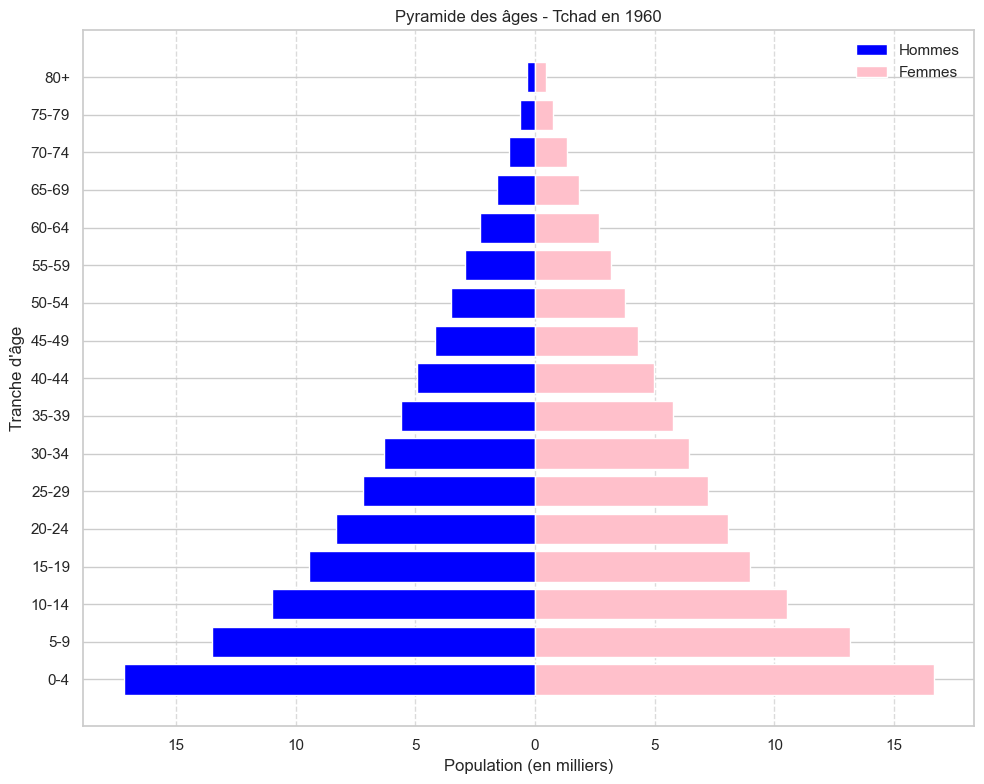

In [516]:
pyramide(data_pop_pivot,1960)

# MES

In [326]:
path="data/data_finale/base_finale_mes.xlsx"
data=pd.read_excel(path,sheet_name="data_mes") 
data.head(2)

,Country,Variable,1960,1961,1962,1963,1964,1965,1966,1967,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,td,indice_prod_ag,..,22.58,25.03,27.83,26.47,25.20,25.51,24.74,...,100.74,92.45,106.81,98.37,103.38,109.83,105.90,101.49,104.38,..
1,td,tasmax_annuel,33.51,31.99,32.81,33.18,32.88,33.51,33.62,32.50,...,34.44,34.22,34.51,34.30,34.63,34.39,34.19,34.60,33.93,35.01


In [327]:
import pandas as pd 
def tab_large_en_long(data,debut_year,fin_year):
    base_panel=pd.melt(data, id_vars=['Country','Variable'], value_vars=[i for i in range(debut_year,fin_year+1,1)], var_name='Year',value_name='valeur')
    base_panel['Year']=base_panel['Year'].astype(int)

    # Convertir valeur en numérique et remplacer les erreurs par NaN
    base_panel['valeur'] = pd.to_numeric(base_panel['valeur'], errors='coerce')

    base_panel=base_panel.pivot_table(index=['Country','Year'],columns='Variable', values='valeur').reset_index()
    return base_panel

In [328]:
base=tab_large_en_long(data,1960,2023)

In [329]:
#base.to_excel("nbc.xlsx")
base.head(2)

Variable,Country,Year,aqua_culti_land,aqua_pluvio,gaz_effet_serre,indice_prod_ag,tasmax_annuel,tasmin_annuel
0,td,1960,NaN,NaN,NaN,NaN,33.51,19.84
1,td,1961,NaN,NaN,NaN,22.58,31.99,18.72


## base additif

In [330]:
data_ag=pd.read_excel(path,sheet_name="emploi_ag") 
data_ag.head(2)
base = pd.merge(base, data_ag, on='Year', how='left')
base.head(2)

,Country,Year,aqua_culti_land,aqua_pluvio,gaz_effet_serre,indice_prod_ag,tasmax_annuel,tasmin_annuel,emploi_ag
0,td,1960,NaN,NaN,NaN,NaN,33.51,19.84,NaN
1,td,1961,NaN,NaN,NaN,22.58,31.99,18.72,NaN


In [331]:
#Macrotrends Data Download
data_coton=pd.read_csv("data/data_finale/data_cotton.csv")
data_coton.head(2)

,date,value
0,1972-08-22,0.2673
1,1972-08-23,0.2703


In [332]:
def convert_var(data,anc_var,nouv_var,var_kg):
    # Convertir la colonne 'date' en format datetime
    data['date'] = pd.to_datetime(data['date'])

    # Extraire l'année et créer la colonne 'Year'
    data['Year'] = data['date'].dt.year
    data.columns = data.columns.str.strip()# Supprime les espaces autour des noms de colonnes

    # Calculer la moyenne annuelle de 'value' en groupant par 'Year'
    moyenne_annuelle = data.groupby('Year')[anc_var].transform('mean')

    # Ajouter la colonne 'moyenne' à la base
    data['moyenne'] = moyenne_annuelle
    # Calculer la moyenne par année
    data_cot = data.groupby('Year')['value'].mean().reset_index()

    # Renommer la colonne moyenne
    data_cot = data_cot.rename(columns={'value': nouv_var})

    # Ajouter une colonne Prix_cotton qui contient la conversion en USD/kg
    data_cot[var_kg] = data_cot[nouv_var] / 0.453592
    return data_cot

In [333]:
data_cot=convert_var(data_coton,'value','Prix_cotton(USD/livre)','Prix_cotton (USD/kg)')
data_cot.head(2)

,Year,Prix_cotton(USD/livre),Prix_cotton (USD/kg)
0,1972,0.297552,0.655991
1,1973,0.598669,1.319840


In [334]:
# Créer une série complète d'années de 1960 à 2023
all_years = pd.DataFrame({'Year': range(1960, 2024)})
# Fusionner avec le DataFrame existant pour inclure toutes les années
data_cot = pd.merge(all_years, data_cot, on='Year', how='left')

# Afficher le résultat
data_cot.head(2)

,Year,Prix_cotton(USD/livre),Prix_cotton (USD/kg)
0,1960,NaN,NaN
1,1961,NaN,NaN


In [335]:
base["Prix_cotton (USD/kg)"]= data_cot["Prix_cotton (USD/kg)"]
base

,Country,Year,aqua_culti_land,aqua_pluvio,gaz_effet_serre,indice_prod_ag,tasmax_annuel,tasmin_annuel,emploi_ag,Prix_cotton (USD/kg)
0,td,1960,NaN,NaN,NaN,NaN,33.51,19.84,NaN,NaN
1,td,1961,NaN,NaN,NaN,22.58,31.99,18.72,NaN,NaN
2,td,1962,NaN,NaN,NaN,25.03,32.81,19.49,NaN,NaN
3,td,1963,NaN,NaN,NaN,27.83,33.18,19.87,NaN,NaN
4,td,1964,NaN,NaN,NaN,26.47,32.88,19.12,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
59,td,2019,4.157321,648.2,4.687813,109.83,34.39,21.44,69.842184,1.485232
60,td,2020,4.157321,648.2,4.765552,105.90,34.19,21.32,69.766071,1.417045
61,td,2021,4.157321,648.2,4.824752,101.49,34.60,21.44,69.549439,2.060450
62,td,2022,NaN,NaN,4.867828,104.38,33.93,20.99,69.153914,2.487663


In [336]:
#Macrotrends Data Download
data_corn=pd.read_csv("data/data_finale/data_corn.csv")
data_corn.head(2)

,date,value
0,1959-07-01,1.177
1,1959-07-02,1.176


In [337]:
data_cor=convert_var(data_corn,'value','Prix_corn(USD/livre)','Prix_corn (USD/kg)')
data_cor.head(2)

,Year,Prix_corn(USD/livre),Prix_corn (USD/kg)
0,1959,1.151117,2.537781
1,1960,1.139188,2.511482


In [338]:
# Fusionner les bases sur la colonne "Year"
base = pd.merge(base, data_cor[['Year', 'Prix_corn (USD/kg)']], on='Year', how='left')
base

,Country,Year,aqua_culti_land,aqua_pluvio,gaz_effet_serre,indice_prod_ag,tasmax_annuel,tasmin_annuel,emploi_ag,Prix_cotton (USD/kg),Prix_corn (USD/kg)
0,td,1960,NaN,NaN,NaN,NaN,33.51,19.84,NaN,NaN,2.511482
1,td,1961,NaN,NaN,NaN,22.58,31.99,18.72,NaN,NaN,2.488961
2,td,1962,NaN,NaN,NaN,25.03,32.81,19.49,NaN,NaN,2.414563
3,td,1963,NaN,NaN,NaN,27.83,33.18,19.87,NaN,NaN,2.629954
4,td,1964,NaN,NaN,NaN,26.47,32.88,19.12,NaN,NaN,2.683997
...,...,...,...,...,...,...,...,...,...,...,...
59,td,2019,4.157321,648.2,4.687813,109.83,34.39,21.44,69.842184,1.485232,8.497493
60,td,2020,4.157321,648.2,4.765552,105.90,34.19,21.32,69.766071,1.417045,8.023330
61,td,2021,4.157321,648.2,4.824752,101.49,34.60,21.44,69.549439,2.060450,12.674562
62,td,2022,NaN,NaN,4.867828,104.38,33.93,20.99,69.153914,2.487663,15.306566


In [339]:
base.columns

Index(['Country', 'Year', 'aqua_culti_land', 'aqua_pluvio', 'gaz_effet_serre',
       'indice_prod_ag', 'tasmax_annuel', 'tasmin_annuel', 'emploi_ag',
       'Prix_cotton (USD/kg)', 'Prix_corn (USD/kg)'],
      dtype='object')

# gestion des valeurs manquantes

In [348]:
base.isnull().sum()

Country                  0
Year                     0
aqua_culti_land          9
aqua_pluvio              9
gaz_effet_serre         11
indice_prod_ag           2
tasmax_annuel            0
tasmin_annuel            0
emploi_ag               32
Prix_cotton (USD/kg)    12
Prix_corn (USD/kg)       0
dtype: int64

In [506]:
#recap des valeurs manquantes
df=base.copy()
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

# Création d'un DataFrame pour résumer les informations
missing_summary = pd.DataFrame({
    'Variable': df.columns,
    'Valeurs Manquantes': missing_values,
    'Pourcentage (%)': missing_percentage
}).reset_index(drop=True)

# Affichage des variables ayant des valeurs manquantes
missing_summary = missing_summary[missing_summary['Valeurs Manquantes'] > 0]
print(missing_summary)

               Variable  Valeurs Manquantes  Pourcentage (%)
2       aqua_culti_land                   9          14.0625
3           aqua_pluvio                   9          14.0625
4       gaz_effet_serre                  11          17.1875
5        indice_prod_ag                   2           3.1250
8             emploi_ag                  32          50.0000
9  Prix_cotton (USD/kg)                  12          18.7500



Traitement de la variable : aqua_pluvio


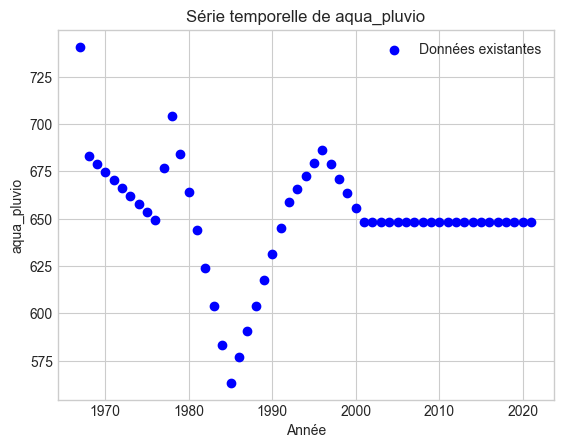


Traitement de la variable : indice_prod_ag


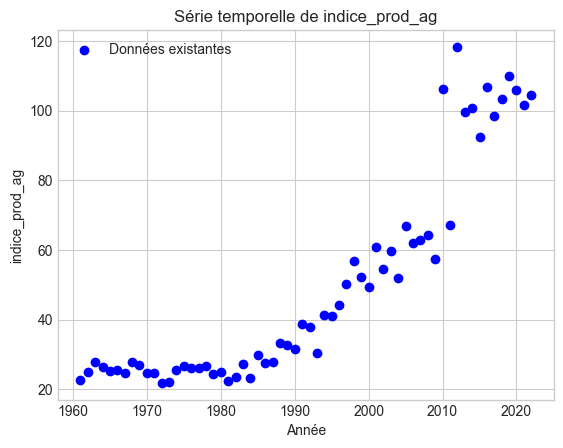


Traitement de la variable : aqua_culti_land


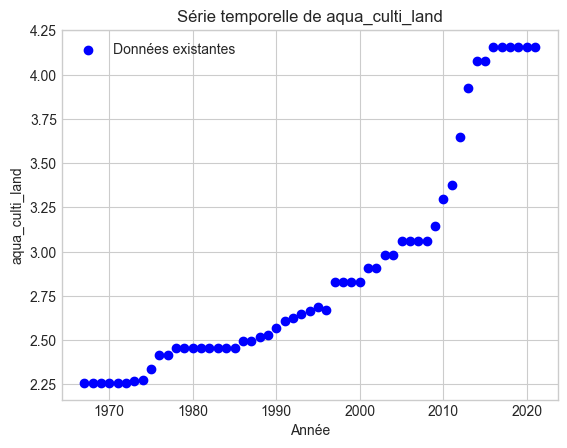


Traitement de la variable : gaz_effet_serre


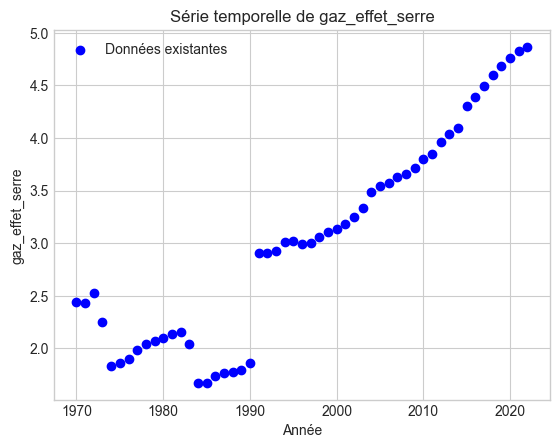


Traitement de la variable : emploi_ag


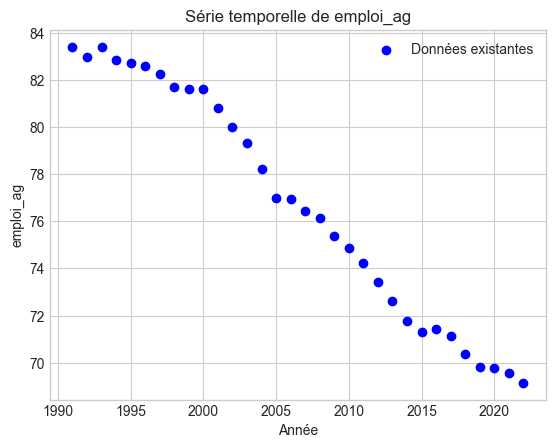


Traitement de la variable : Prix_cotton (USD/kg)


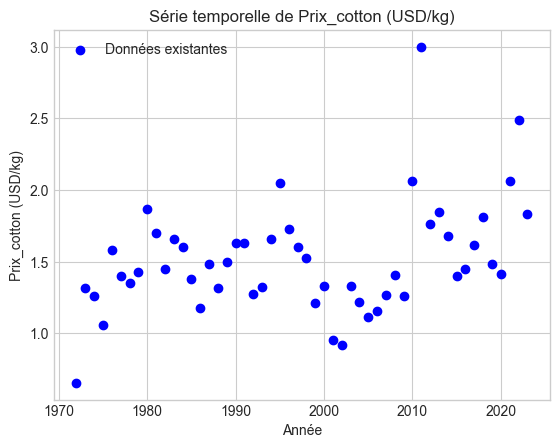

In [385]:
variables = ["Year","aqua_pluvio","indice_prod_ag", "aqua_culti_land","gaz_effet_serre",'emploi_ag','Prix_cotton (USD/kg)']
for var in variables[1:]:
    print(f"\nTraitement de la variable : {var}")
    data=base.copy()
    # Filtrer les valeurs non manquantes
    valid_data = data.dropna(subset=[var])
    X = valid_data["Year"].values.reshape(-1, 1)
    y = valid_data[var].values

    # Représenter graphiquement la série
    plt.figure()
    plt.scatter(X, y, label="Données existantes", color="blue")
    plt.title(f"Série temporelle de {var}")
    plt.xlabel("Année")
    plt.ylabel(var)
    plt.legend()
    plt.show()

In [ ]:
# on regarde si la tendance des séries en terme de regression pour les autres variables sans l'indice de production car imputation par moy géométrique

In [388]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from scipy.optimize import curve_fit



#variables = ["Year", "aqua_culti_land", "gaz_effet_serre", "indice_prod_ag"]
def coeff_corr(base,variables):
    data = base[variables]
    # Fonction pour une régression exponentielle
    def exp_func(x, a, b):
        return a * np.exp(b * x)

    # Stocker les résultats d'imputation
    imputed_data = data.copy()

    # DataFrame pour stocker les corrélations
    correlation_data = []
    #correlation_df = pd.DataFrame(columns=["Variable", "Modèle", "Corrélation"])
    # Parcourir chaque variable sauf "Year"
    for var in variables[1:]:
        print(f"\nTraitement de la variable : {var}")

        # Filtrer les valeurs non manquantes
        valid_data = data.dropna(subset=[var])
        X = valid_data["Year"].values.reshape(-1, 1)
        y = valid_data[var].values

        # Modèles de régression
        correlations = {}

        # 1. Régression linéaire
        linear_model = LinearRegression()
        linear_model.fit(X, y)
        y_pred_linear = linear_model.predict(X)
        corr_linear = np.corrcoef(y, y_pred_linear)[0, 1]
        correlations["linéaire"] = corr_linear
        # Ajouter au DataFrame
        #correlation_df = correlation_df.append({"Variable": var, "Modèle": "Linaire", "Corrélation": corr_linear}, ignore_index=True)
        correlation_data.append({"Variable": var, "Modèle": "Linéaire", "Corrélation": corr_linear})


        # 2. Régression exponentielle
        try:
            popt, _ = curve_fit(exp_func, X.flatten(), y)
            y_pred_exp = exp_func(X.flatten(), *popt)
            corr_exp = np.corrcoef(y, y_pred_exp)[0, 1]
            #correlations["exponentielle"] = corr_exp
            correlation_data.append({"Variable": var, "Modèle": "Exponentielle", "Corrélation": corr_exp})
        except:
            print("Régression exponentielle impossible pour cette variable.")

        # 3. Régression polynomiale (de degré 2)
        poly = PolynomialFeatures(degree=2)
        X_poly = poly.fit_transform(X)
        poly_model = LinearRegression()
        poly_model.fit(X_poly, y)
        y_pred_poly = poly_model.predict(X_poly)
        corr_poly = np.corrcoef(y, y_pred_poly)[0, 1]
        #correlations["polynomiale"] = corr_poly
        #base_correlation[var]=correlations
        # Ajouter au DataFrame
        correlation_data.append({"Variable": var, "Modèle": "Polynomiale", "Corrélation": corr_poly})
    # Convertir les corrélations en DataFrame
    correlation_df = pd.DataFrame(correlation_data)
    return correlation_df


In [401]:
variables = ["Year", "aqua_culti_land", "aqua_pluvio","indice_prod_ag", "gaz_effet_serre",'emploi_ag','Prix_cotton (USD/kg)']
correlation_df=coeff_corr(base,variables)
correlation_df


Traitement de la variable : aqua_culti_land
Régression exponentielle impossible pour cette variable.

Traitement de la variable : aqua_pluvio
Régression exponentielle impossible pour cette variable.

Traitement de la variable : indice_prod_ag
Régression exponentielle impossible pour cette variable.

Traitement de la variable : gaz_effet_serre
Régression exponentielle impossible pour cette variable.

Traitement de la variable : emploi_ag
Régression exponentielle impossible pour cette variable.

Traitement de la variable : Prix_cotton (USD/kg)
Régression exponentielle impossible pour cette variable.


C:\Users\Hp\AppData\Local\Temp\ipykernel_28600\2569195936.py:15: RuntimeWarning: overflow encountered in exp
  return a * np.exp(b * x)
C:\Users\Hp\AppData\Local\Temp\ipykernel_28600\2569195936.py:15: RuntimeWarning: overflow encountered in exp
  return a * np.exp(b * x)
C:\Users\Hp\AppData\Local\Temp\ipykernel_28600\2569195936.py:15: RuntimeWarning: overflow encountered in exp
  return a * np.exp(b * x)
C:\Users\Hp\AppData\Local\Temp\ipykernel_28600\2569195936.py:15: RuntimeWarning: overflow encountered in exp
  return a * np.exp(b * x)
C:\Users\Hp\AppData\Local\Temp\ipykernel_28600\2569195936.py:15: RuntimeWarning: overflow encountered in exp
  return a * np.exp(b * x)
C:\Users\Hp\AppData\Local\Temp\ipykernel_28600\2569195936.py:15: RuntimeWarning: overflow encountered in exp
  return a * np.exp(b * x)


,Variable,Modèle,Corrélation
0,aqua_culti_land,Linéaire,0.918066
1,aqua_culti_land,Polynomiale,0.979278
2,aqua_pluvio,Linéaire,0.169757
3,aqua_pluvio,Polynomiale,0.378930
4,indice_prod_ag,Linéaire,0.890987
5,indice_prod_ag,Polynomiale,0.963693
6,gaz_effet_serre,Linéaire,0.922069
7,gaz_effet_serre,Polynomiale,0.958690
8,emploi_ag,Linéaire,0.990455
9,emploi_ag,Polynomiale,0.991339


In [ ]:
#imputer les variables à coeff de corrélation plus élévés par une regression polynomiale

In [396]:
def impute_missing_values(data, correlation_df):
    imputed_data = data.copy()

    for var in correlation_df["Variable"].unique():
        # Trouver le modèle avec la plus grande corrélation
        best_model_row = correlation_df[correlation_df["Variable"] == var].sort_values("Corrélation", ascending=False).iloc[0]
        best_model = best_model_row["Modèle"]
        
        # Filtrer les données valides pour la variable
        valid_data = data.dropna(subset=[var])
        X_valid = valid_data["Year"].values.reshape(-1, 1)
        y_valid = valid_data[var].values

        # Préparer les années manquantes
        missing_years = data[data[var].isna()]["Year"].values.reshape(-1, 1)

        if best_model == "Linéaire":
            # Réentraîner le modèle linéaire
            linear_model = LinearRegression()
            linear_model.fit(X_valid, y_valid)
            imputed_values = linear_model.predict(missing_years)

        #elif best_model == "Exponentielle":
         #   # Ajuster le modèle exponentiel
         #   popt, _ = curve_fit(exp_func, X_valid.flatten(), y_valid)
         #   imputed_values = exp_func(missing_years.flatten(), *popt)

        elif best_model == "Polynomiale":
            # Ajuster le modèle polynomial
            poly = PolynomialFeatures(degree=2)
            X_valid_poly = poly.fit_transform(X_valid)
            poly_model = LinearRegression()
            poly_model.fit(X_valid_poly, y_valid)
            missing_years_poly = poly.fit_transform(missing_years)
            imputed_values = poly_model.predict(missing_years_poly)

        # Remplacer les valeurs manquantes
        imputed_data.loc[data[var].isna(), var] = imputed_values

    return imputed_data

In [402]:
variables = ["Year", "aqua_culti_land","gaz_effet_serre","indice_prod_ag",'emploi_ag']
correlation_df=coeff_corr(base,variables)
correlation_df


Traitement de la variable : aqua_culti_land
Régression exponentielle impossible pour cette variable.

Traitement de la variable : gaz_effet_serre
Régression exponentielle impossible pour cette variable.

Traitement de la variable : indice_prod_ag
Régression exponentielle impossible pour cette variable.

Traitement de la variable : emploi_ag
Régression exponentielle impossible pour cette variable.


C:\Users\Hp\AppData\Local\Temp\ipykernel_28600\2569195936.py:15: RuntimeWarning: overflow encountered in exp
  return a * np.exp(b * x)
C:\Users\Hp\AppData\Local\Temp\ipykernel_28600\2569195936.py:15: RuntimeWarning: overflow encountered in exp
  return a * np.exp(b * x)
C:\Users\Hp\AppData\Local\Temp\ipykernel_28600\2569195936.py:15: RuntimeWarning: overflow encountered in exp
  return a * np.exp(b * x)
C:\Users\Hp\AppData\Local\Temp\ipykernel_28600\2569195936.py:15: RuntimeWarning: overflow encountered in exp
  return a * np.exp(b * x)


,Variable,Modèle,Corrélation
0,aqua_culti_land,Linéaire,0.918066
1,aqua_culti_land,Polynomiale,0.979278
2,gaz_effet_serre,Linéaire,0.922069
3,gaz_effet_serre,Polynomiale,0.958690
4,indice_prod_ag,Linéaire,0.890987
5,indice_prod_ag,Polynomiale,0.963693
6,emploi_ag,Linéaire,0.990455
7,emploi_ag,Polynomiale,0.991339


In [403]:
base_imp_reg=impute_missing_values(base, correlation_df)

In [404]:
base_imp_reg.head(5)

,Country,Year,aqua_culti_land,aqua_pluvio,gaz_effet_serre,indice_prod_ag,tasmax_annuel,tasmin_annuel,emploi_ag,Prix_cotton (USD/kg),Prix_corn (USD/kg)
0,td,1960,2.523169,NaN,2.203625,28.669902,33.51,19.84,95.603350,NaN,2.511482
1,td,1961,2.496156,NaN,2.175531,22.580000,31.99,18.72,95.324853,NaN,2.488961
2,td,1962,2.471021,NaN,2.149885,25.030000,32.81,19.49,95.040958,NaN,2.414563
3,td,1963,2.447764,NaN,2.126686,27.830000,33.18,19.87,94.751664,NaN,2.629954
4,td,1964,2.426385,NaN,2.105936,26.470000,32.88,19.12,94.456971,NaN,2.683997


In [399]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

def plot_polynomial_regression(X, y, degree):
    """
    Représente une série et la courbe de régression polynomiale associée.
    
    Args:
    - X: array-like, les données indépendantes (ex: années).
    - y: array-like, les données dépendantes (valeurs de la série).
    - degree: int, le degré du polynôme.
    """
    # Transformer les données pour un modèle polynomial
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X.reshape(-1, 1))
    
    # Ajuster le modèle
    poly_model = LinearRegression()
    poly_model.fit(X_poly, y)
    
    # Prédictions
    X_plot = np.linspace(X.min(), X.max(), 500).reshape(-1, 1)  # Plus de points pour une courbe lisse
    X_plot_poly = poly.fit_transform(X_plot)
    y_pred = poly_model.predict(X_plot_poly)
    
    # Représentation graphique
    plt.figure(figsize=(10, 6))
    plt.scatter(X, y, color="blue", label="Données existantes", alpha=0.7)
    plt.plot(X_plot, y_pred, color="red", label=f"Régression polynomiale (degré {degree})", linewidth=2)
    plt.title("Régression polynomiale")
    plt.xlabel("X (ex: Années)")
    plt.ylabel("Y (ex: Valeurs)")
    plt.legend()
    plt.grid(True)
    plt.show()






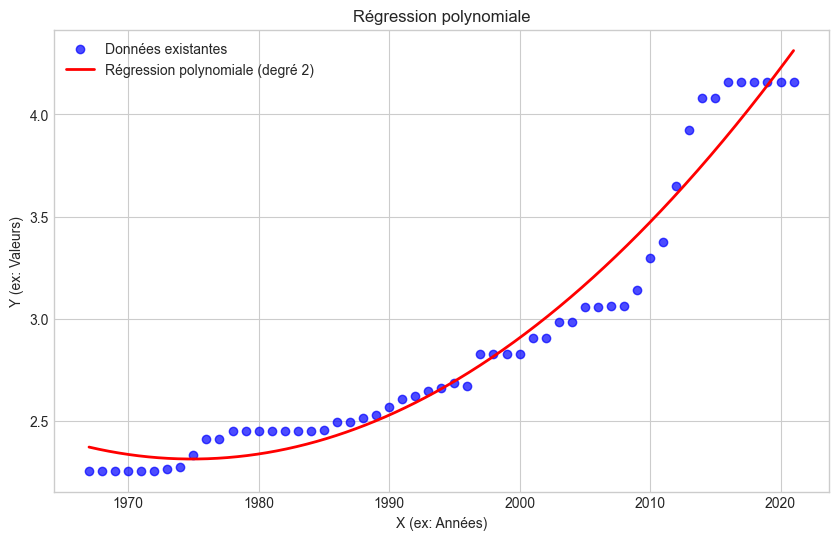

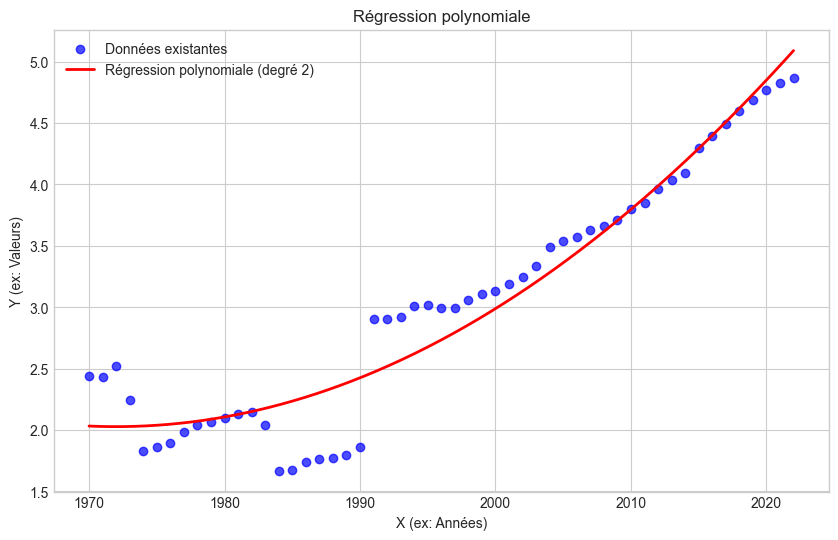

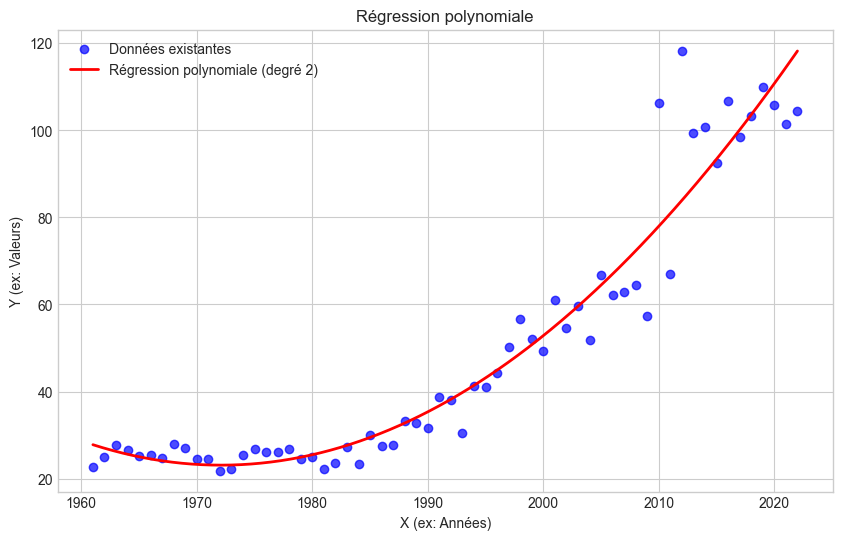

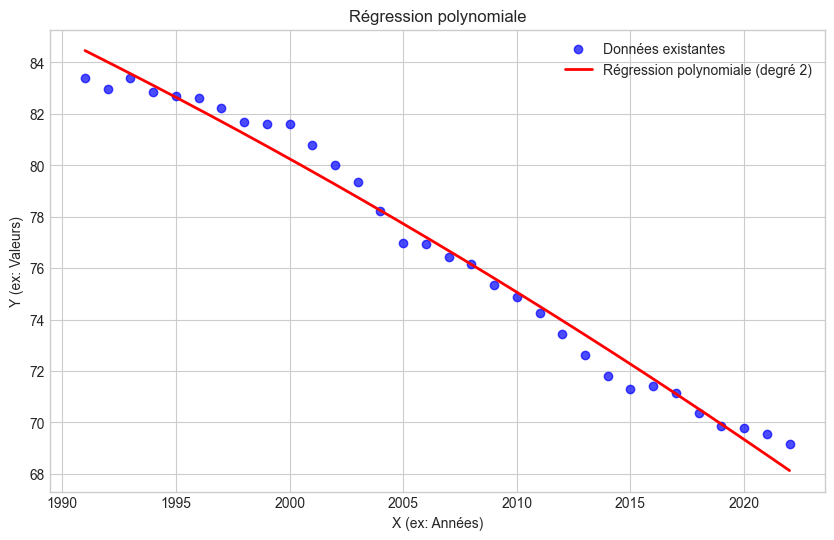

In [400]:
variables = ["aqua_culti_land", "gaz_effet_serre", "indice_prod_ag","emploi_ag"]
for var in variables:
    valid_data = data.dropna(subset=[var])
    X = np.array(list(valid_data["Year"]))
    y = np.array(list(valid_data[var]))

    plot_polynomial_regression(X, y, degree=2)

## imputation par la moyenne géométrique

In [405]:
import pandas as pd
import numpy as np

# Calcul de la moyenne géométrique
def geometric_mean(series):
    """
    Calcule la moyenne géométrique des valeurs d'une série pandas non nulle.
    """
    non_null_values = series.dropna()
    product = np.prod(non_null_values)
    n = len(non_null_values)
    return product**(1/n)

# Imputation des valeurs manquantes
def impute_with_geometric_mean(base, column_name):
    """
    Impute les valeurs manquantes d'une colonne avec la moyenne géométrique de ses valeurs non manquantes.
    
    Args:
    - base (pd.DataFrame): La base de données contenant la colonne à imputer.
    - column_name (str): Le nom de la colonne à imputer.
    
    Returns:
    - pd.DataFrame: Une nouvelle base de données avec les valeurs imputées.
    """
    # Calculer la moyenne géométrique
    geo_mean = geometric_mean(base[column_name])
    print(f"Moyenne géométrique pour {column_name} : {geo_mean:.2f}")
    
    # Remplir les valeurs manquantes
    base_imputed = base.copy()
    base_imputed[column_name] = base_imputed[column_name].fillna(geo_mean)
    
    return base_imputed

# Exemple d'utilisation
# Charger la base (remplacez par votre chemin ou DataFrame réel)
# base = pd.read_csv("path/to/your/data.csv")


# Appliquer l'imputation
base_imputed_geom = impute_with_geometric_mean(base_imp_reg, "aqua_pluvio")



Moyenne géométrique pour aqua_pluvio : 650.13


## imputation par la médiane

In [ ]:
def imput_mediane(data,var):
    # Calculer la médiane
    median_value = data[var].median()
    print(f"Médiane calculée : {median_value}")

    # Imputer les valeurs manquantes avec la médiane
    data[var] = data[var].fillna(median_value)
    print("Imputation terminée.")
    return data


In [505]:
base_imputed_geom.isna().sum()

Country                 0
Year                    0
aqua_culti_land         0
aqua_pluvio             0
gaz_effet_serre         0
indice_prod_ag          0
tasmax_annuel           0
tasmin_annuel           0
emploi_ag               0
Prix_cotton (USD/kg)    0
Prix_corn (USD/kg)      0
dtype: int64

In [418]:
base_finale_mes=imput_mediane(base_imputed_geom,"Prix_cotton (USD/kg)")

Médiane calculée : 1.4467067519361465
Imputation terminée.


## base finale

In [422]:
base_finale_mes=base_finale_mes.drop(columns="Country")
base_finale_mes.isna().sum()

Year                    0
aqua_culti_land         0
aqua_pluvio             0
gaz_effet_serre         0
indice_prod_ag          0
tasmax_annuel           0
tasmin_annuel           0
emploi_ag               0
Prix_cotton (USD/kg)    0
Prix_corn (USD/kg)      0
dtype: int64

In [143]:
base_finale_mes.to_excel("New_base_finale_mes.xlsx",index=False)
# Supprimer les colonnes sans nom (nom vide ou NaN)
#data1 = base_finale_mes.loc[:, ~data.columns.str.match(r'^\s*$')]

## valeurs abérentes

In [427]:
base_finale_mes.columns
variables=['aqua_culti_land', 'aqua_pluvio', 'gaz_effet_serre','indice_prod_ag', 'tasmax_annuel', 'tasmin_annuel', 'emploi_ag','Prix_cotton (USD/kg)', 'Prix_corn (USD/kg)']

In [452]:
variables=list(base_finale_mes.columns)
variables.remove("Year")
variables

['aqua_culti_land',
 'aqua_pluvio',
 'gaz_effet_serre',
 'indice_prod_ag',
 'tasmax_annuel',
 'tasmin_annuel',
 'emploi_ag',
 'Prix_cotton (USD/kg)',
 'Prix_corn (USD/kg)']

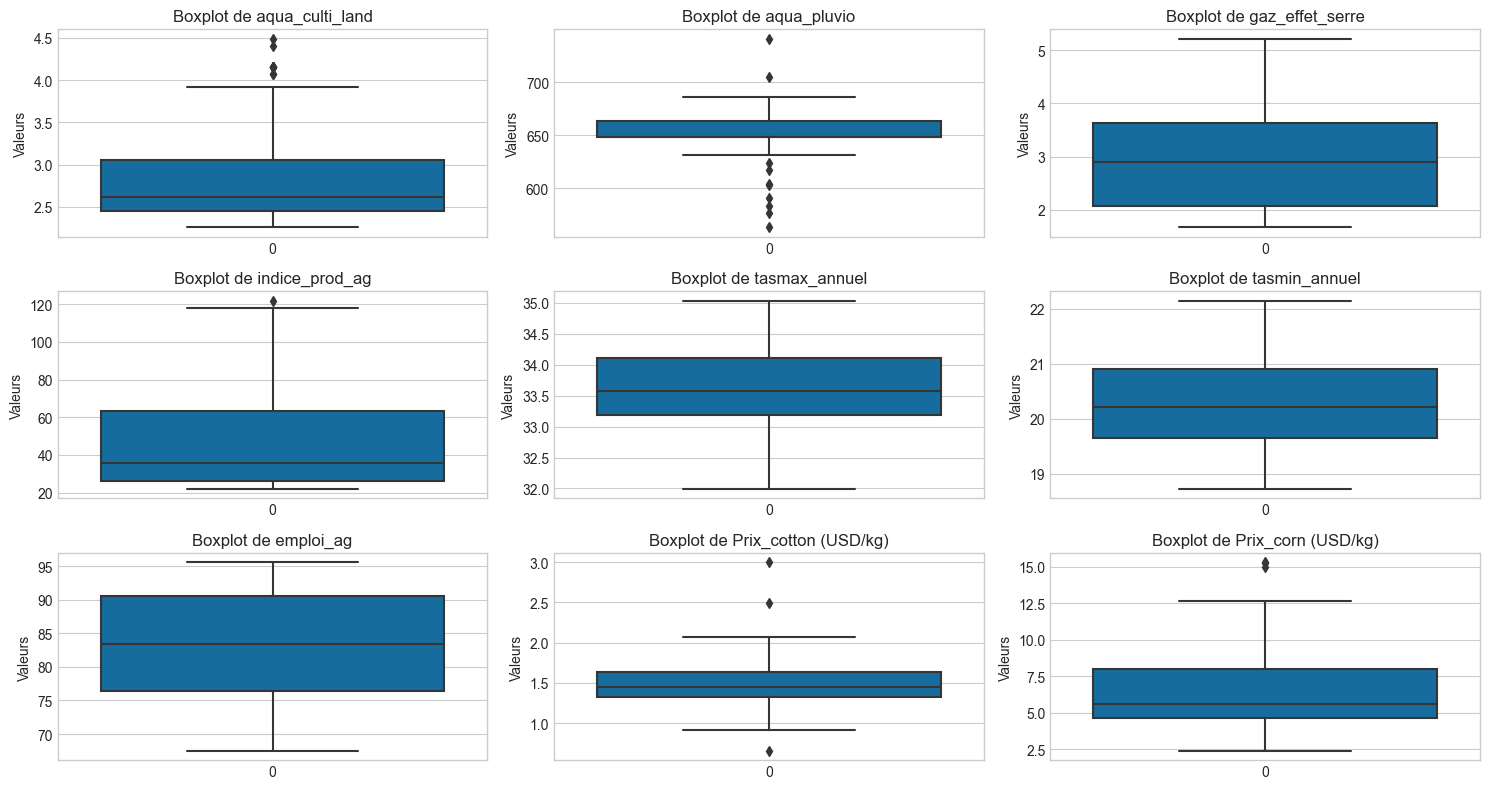

In [429]:

# Création de la figure et des axes pour les boxplots (2 lignes et 3 colonnes pour 6 variables)
fig, axes = plt.subplots(3, 3, figsize=(15, 8))

# Aplatir les axes pour itérer facilement
axes = axes.flatten()

# Création des boxplots pour chaque variable
for i, var in enumerate(variables):
    sns.boxplot(data=base_finale_mes[var], ax=axes[i])
    axes[i].set_title(f"Boxplot de {var}")
    axes[i].set_ylabel("Valeurs")

# Ajuster les espacements entre les subgraphiques
plt.tight_layout()
plt.show()



In [432]:
# Fonction pour détecter les valeurs aberrantes
def detect_outliers(df):
    outliers_percentage = {}
    
    for column in df.select_dtypes(include=['float64', 'int64']).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        
        # Définition des bornes pour les valeurs aberrantes
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Compter le nombre d'outliers
        outliers_count = ((df[column] < lower_bound) | (df[column] > upper_bound)).sum()
        
        # Calculer le pourcentage d'outliers
        total_count = len(df[column])
        outliers_percentage[column] = (outliers_count / total_count) * 100
    
    return outliers_percentage

# Calcul des pourcentages de valeurs aberrantes
outliers_percentage = detect_outliers(base_finale_mes[variables])

# Afficher les résultats
for column, percentage in outliers_percentage.items():
    print(f"{column}: {percentage:.2f}% de valeurs aberrantes")

aqua_culti_land: 15.62% de valeurs aberrantes
aqua_pluvio: 15.62% de valeurs aberrantes
gaz_effet_serre: 0.00% de valeurs aberrantes
indice_prod_ag: 1.56% de valeurs aberrantes
tasmax_annuel: 0.00% de valeurs aberrantes
tasmin_annuel: 0.00% de valeurs aberrantes
emploi_ag: 0.00% de valeurs aberrantes
Prix_cotton (USD/kg): 4.69% de valeurs aberrantes
Prix_corn (USD/kg): 4.69% de valeurs aberrantes


In [430]:
# Fonction pour détecter les valeurs aberrantes
def detect_outliers_summary(df):
    summary = {
        "Variable": [],
        "Total valeurs aberrantes": [],
        "Pourcentage valeurs aberrantes": []
    }
    
    for column in df.select_dtypes(include=['float64', 'int64']).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        
        # Définition des bornes pour les valeurs aberrantes
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Compter le nombre d'outliers
        outliers_count = ((df[column] < lower_bound) | (df[column] > upper_bound)).sum()
        
        # Calculer le pourcentage d'outliers
        total_count = len(df[column])
        percentage = (outliers_count / total_count) * 100
        
        # Ajouter les résultats au résumé
        summary["Variable"].append(column)
        summary["Total valeurs aberrantes"].append(outliers_count)
        summary["Pourcentage valeurs aberrantes"].append(round(percentage, 2))
    
    return pd.DataFrame(summary)

# Obtenir le tableau des valeurs aberrantes
outliers_summary = detect_outliers_summary(base_finale_mes[variables])

# Afficher le tableau
print(outliers_summary)


               Variable  Total valeurs aberrantes  \
0       aqua_culti_land                        10   
1           aqua_pluvio                        10   
2       gaz_effet_serre                         0   
3        indice_prod_ag                         1   
4         tasmax_annuel                         0   
5         tasmin_annuel                         0   
6             emploi_ag                         0   
7  Prix_cotton (USD/kg)                         3   
8    Prix_corn (USD/kg)                         3   

   Pourcentage valeurs aberrantes  
0                           15.62  
1                           15.62  
2                            0.00  
3                            1.56  
4                            0.00  
5                            0.00  
6                            0.00  
7                            4.69  
8                            4.69  


In [431]:
def create_outlier_dummies(df, variables):
    """
    Ajoute des colonnes dummy à la base de données pour indiquer les valeurs aberrantes.
    
    :param df: DataFrame pandas
    :param variables: Liste des noms des colonnes à vérifier pour les valeurs aberrantes
    :return: DataFrame avec les colonnes dummy ajoutées
    """
    df = df.copy()  # Créer une copie de la base de données pour éviter de modifier l'original

    for column in variables:
        if column in df.columns:
            Q1 = df[column].quantile(0.25)
            Q3 = df[column].quantile(0.75)
            IQR = Q3 - Q1
            
            # Définir les bornes pour les valeurs aberrantes
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            
            # Créer une colonne dummy pour indiquer les valeurs aberrantes
            dummy_name = f"{column}_outlier"
            df[dummy_name] = ((df[column] < lower_bound) | (df[column] > upper_bound)).astype(int)
        else:
            print(f"Attention : La colonne '{column}' n'existe pas dans la base de données.")
    
    return df


In [434]:
base_finale_mes_dummy=create_outlier_dummies(base_finale_mes, ["aqua_culti_land","aqua_pluvio"])
#a.to_excel("new_dummy_base_finale_mes.xlsx")

In [439]:
essai=list(base_finale_mes.columns)
len(essai)

10

# Stat desc

## Univariée

In [453]:
#importation des bibliothèques
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

In [493]:
variables =list(base_finale_mes.columns)
variables.remove("Year")
variables

['aqua_culti_land',
 'aqua_pluvio',
 'gaz_effet_serre',
 'indice_prod_ag',
 'tasmax_annuel',
 'tasmin_annuel',
 'emploi_ag',
 'Prix_cotton (USD/kg)',
 'Prix_corn (USD/kg)']

In [469]:
base_finale_mes.emploi_ag.min()

67.51429980572175

In [475]:
variable_meanings = {
    'aqua_culti_land': "Surface totale des terres agricoles cultivées (%)",
    'aqua_pluvio': "Indice pluviométrique annuel",
    'gaz_effet_serre': "Émissions totales de gaz à effet de serre (t CO2/personne)",
    'indice_prod_ag': "Indice de production agricole",
    'tasmax_annuel': "Température maximale moyenne annuelle (°C)",
    'tasmin_annuel': "Température minimale moyenne annuelle (°C)",
    'emploi_ag':"Employé agricole(%population employée)",
    'Prix_cotton (USD/kg)':"Prix du coton($ US/kg)",
    'Prix_corn (USD/kg)':"Prix du maïs ($ US/kg)"
}
variable_color={
    'aqua_culti_land': "brown",
    'aqua_pluvio': "purple",
    'gaz_effet_serre': "orange",
    'indice_prod_ag': "b",
    'tasmax_annuel': "r",
    'tasmin_annuel': "g",
    'emploi_ag':"brown",
    'Prix_cotton (USD/kg)':"brown",
    'Prix_corn (USD/kg)':"brown"
}

In [507]:
base_finale_mes[variables].describe()

,aqua_culti_land,aqua_pluvio,gaz_effet_serre,tasmax_annuel,tasmin_annuel,emploi_ag,Prix_cotton (USD/kg),Prix_corn (USD/kg)
count,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000
mean,2.894773,650.729122,2.912176,33.601406,20.284531,83.316120,1.500449,6.352474
std,0.659295,27.753151,0.999051,0.671097,0.781094,8.355479,0.345090,3.187404
min,2.258567,563.300000,1.670140,31.990000,18.720000,67.514300,0.655991,2.414563
25%,2.453271,648.200000,2.063190,33.187500,19.642500,76.375113,1.326975,4.653559
50%,2.616822,648.900000,2.906774,33.580000,20.205000,83.386943,1.446707,5.604040
75%,3.061526,663.649286,3.635796,34.102500,20.900000,90.589424,1.629132,7.985054
max,4.488885,740.900000,5.214241,35.040000,22.150000,95.603350,2.998584,15.306566


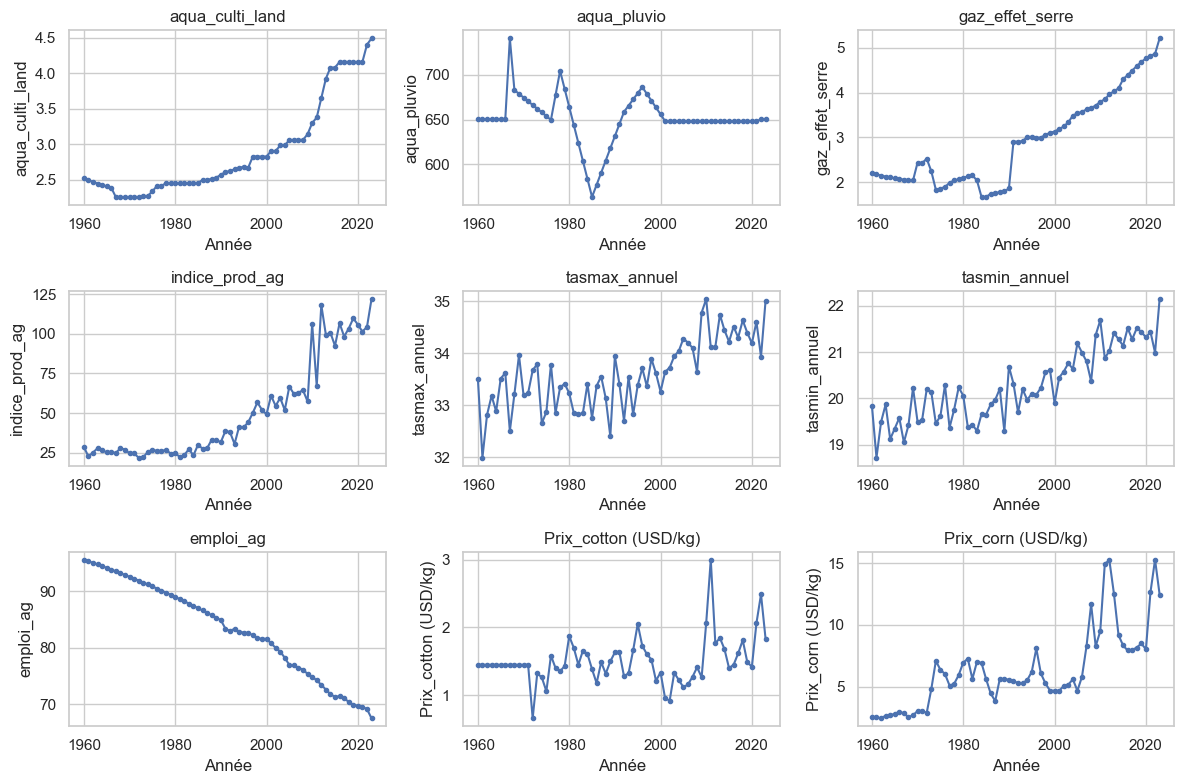

In [471]:
# Création des graphiques pour chaque variable
plt.figure(figsize=(12, 8))
for i, variable in enumerate(variables, 1):
    plt.subplot(3, 3, i)  # Organisation en 2 lignes et 3 colonnes
    plt.plot(base_finale_mes['Year'], base_finale_mes[variable], marker='.')
    plt.title(variable)
    plt.xlabel('Année')
    plt.ylabel(variable)
    plt.grid(True)

# Ajuster les espaces entre les graphiques
plt.tight_layout()
plt.show()

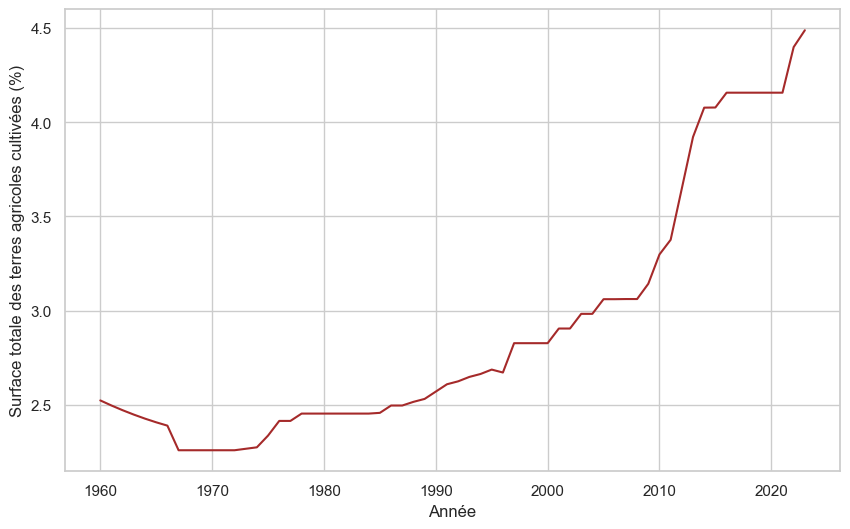

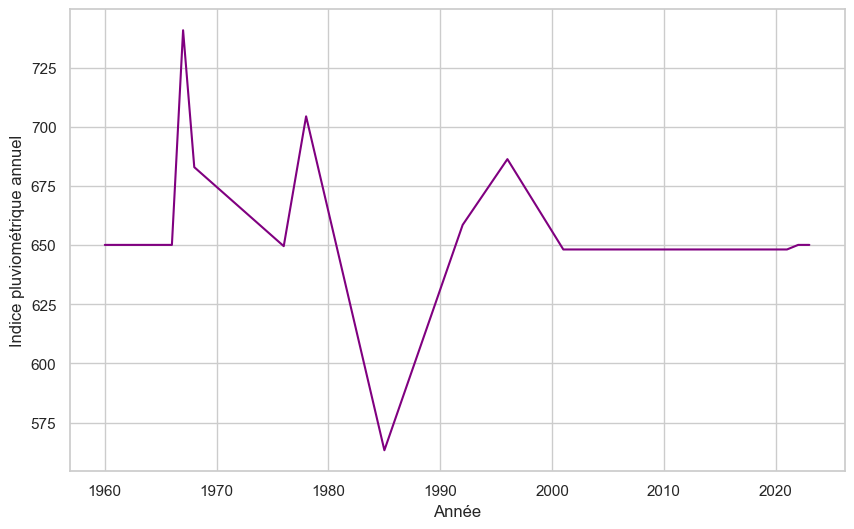

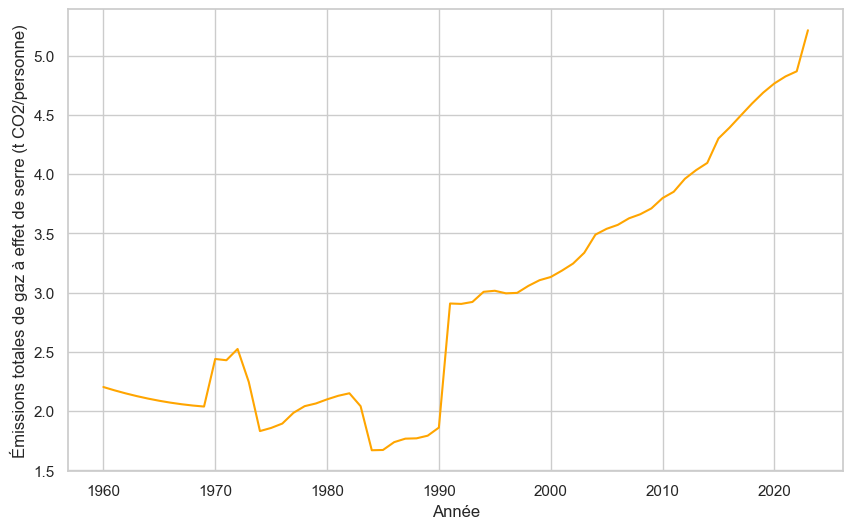

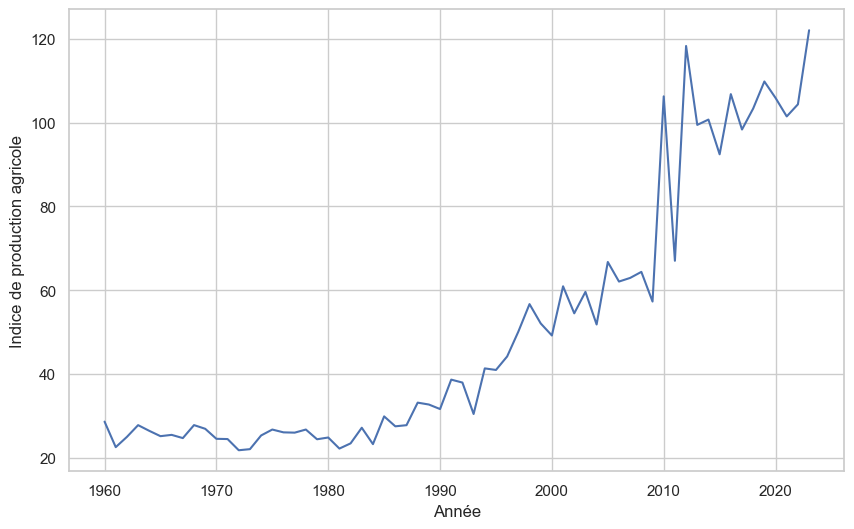

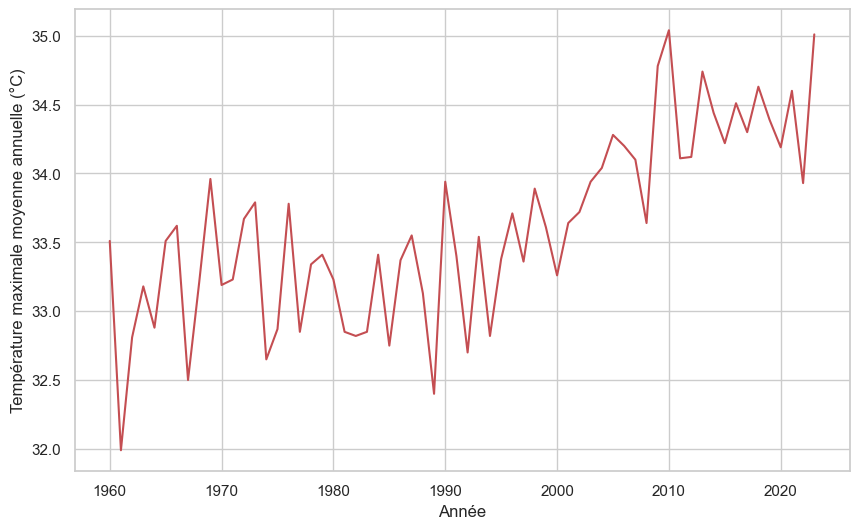

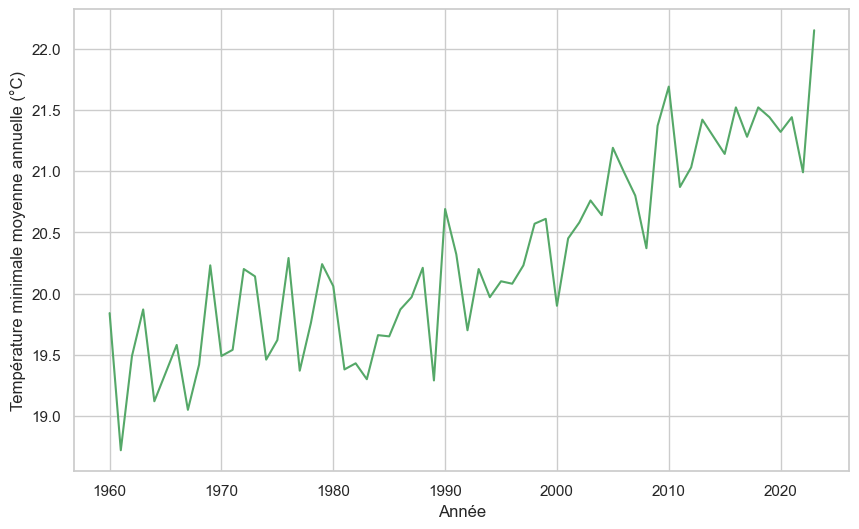

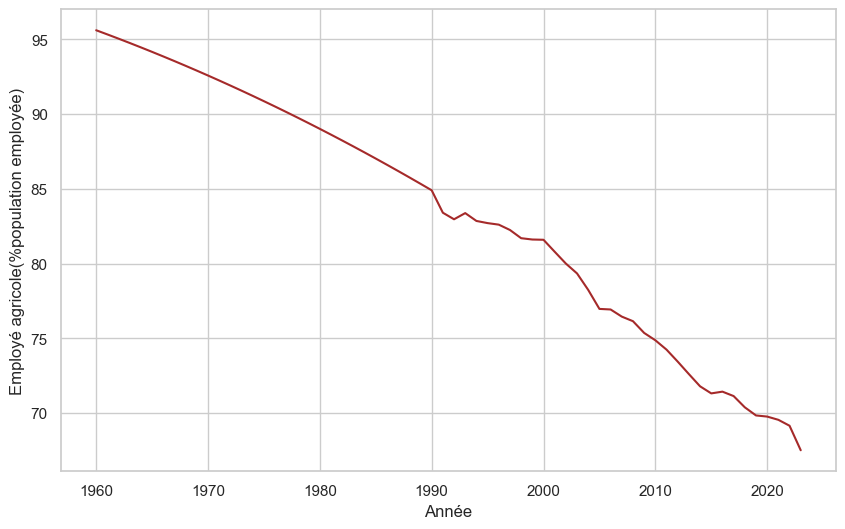

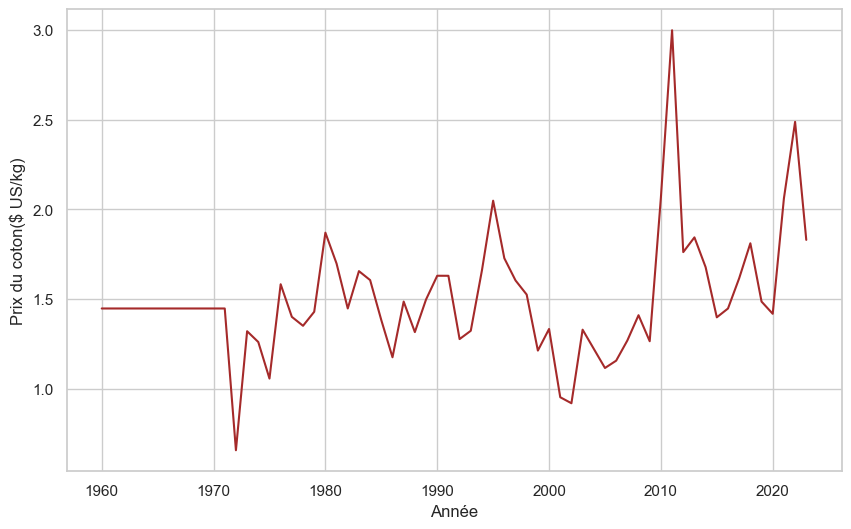

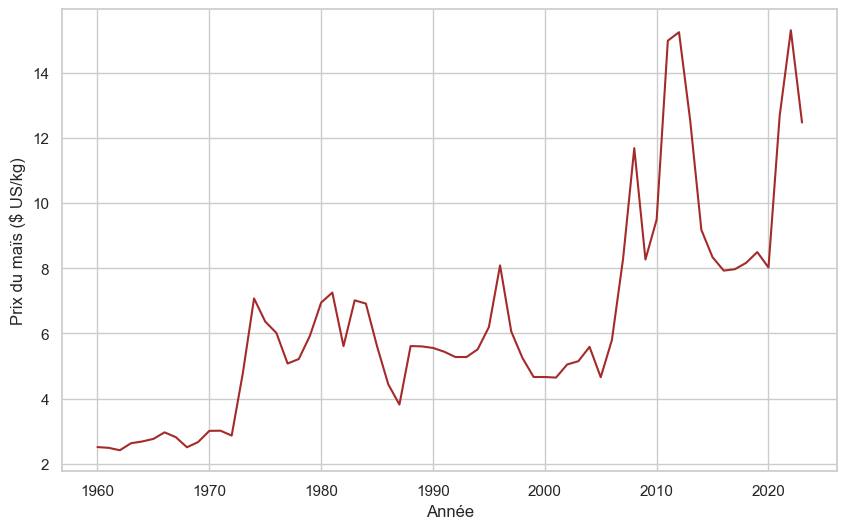

In [478]:
for var in variables:
    # Style pour les graphiques
    plt.style.use ('seaborn-v0_8-colorblind')#('seaborn-darkgrid')

    # 1. Indice pluviométrique
    plt.figure(figsize=(10, 6))
    plt.plot(df['Year'], df[var], label=f'{variable_meanings[var]}', color=f'{variable_color[var]}')
    #plt.plot(df['Year'], df['indice_prod_ag'], label='Indice de production agricole', color='brown')
    #plt.title('Évolution de l\'indice pluviométrique')
    plt.xlabel('Année')
    plt.ylabel(f'{variable_meanings[var]}')
    #plt.legend()
    plt.show()

In [509]:
variable_meanings


{'aqua_culti_land': 'Surface totale des terres agricoles cultivées (%)',
 'aqua_pluvio': 'Indice pluviométrique annuel',
 'gaz_effet_serre': 'Émissions totales de gaz à effet de serre (t CO2/personne)',
 'indice_prod_ag': 'Indice de production agricole',
 'tasmax_annuel': 'Température maximale moyenne annuelle (°C)',
 'tasmin_annuel': 'Température minimale moyenne annuelle (°C)',
 'emploi_ag': 'Employé agricole(%population employée)',
 'Prix_cotton (USD/kg)': 'Prix du coton($ US/kg)',
 'Prix_corn (USD/kg)': 'Prix du maïs ($ US/kg)'}

C:\Users\Hp\AppData\Local\Temp\ipykernel_28600\547677960.py:49: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  plt.tight_layout(rect=[0, 0, 1, 0.96])  # Ajustement des marges
c:\Users\Hp\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


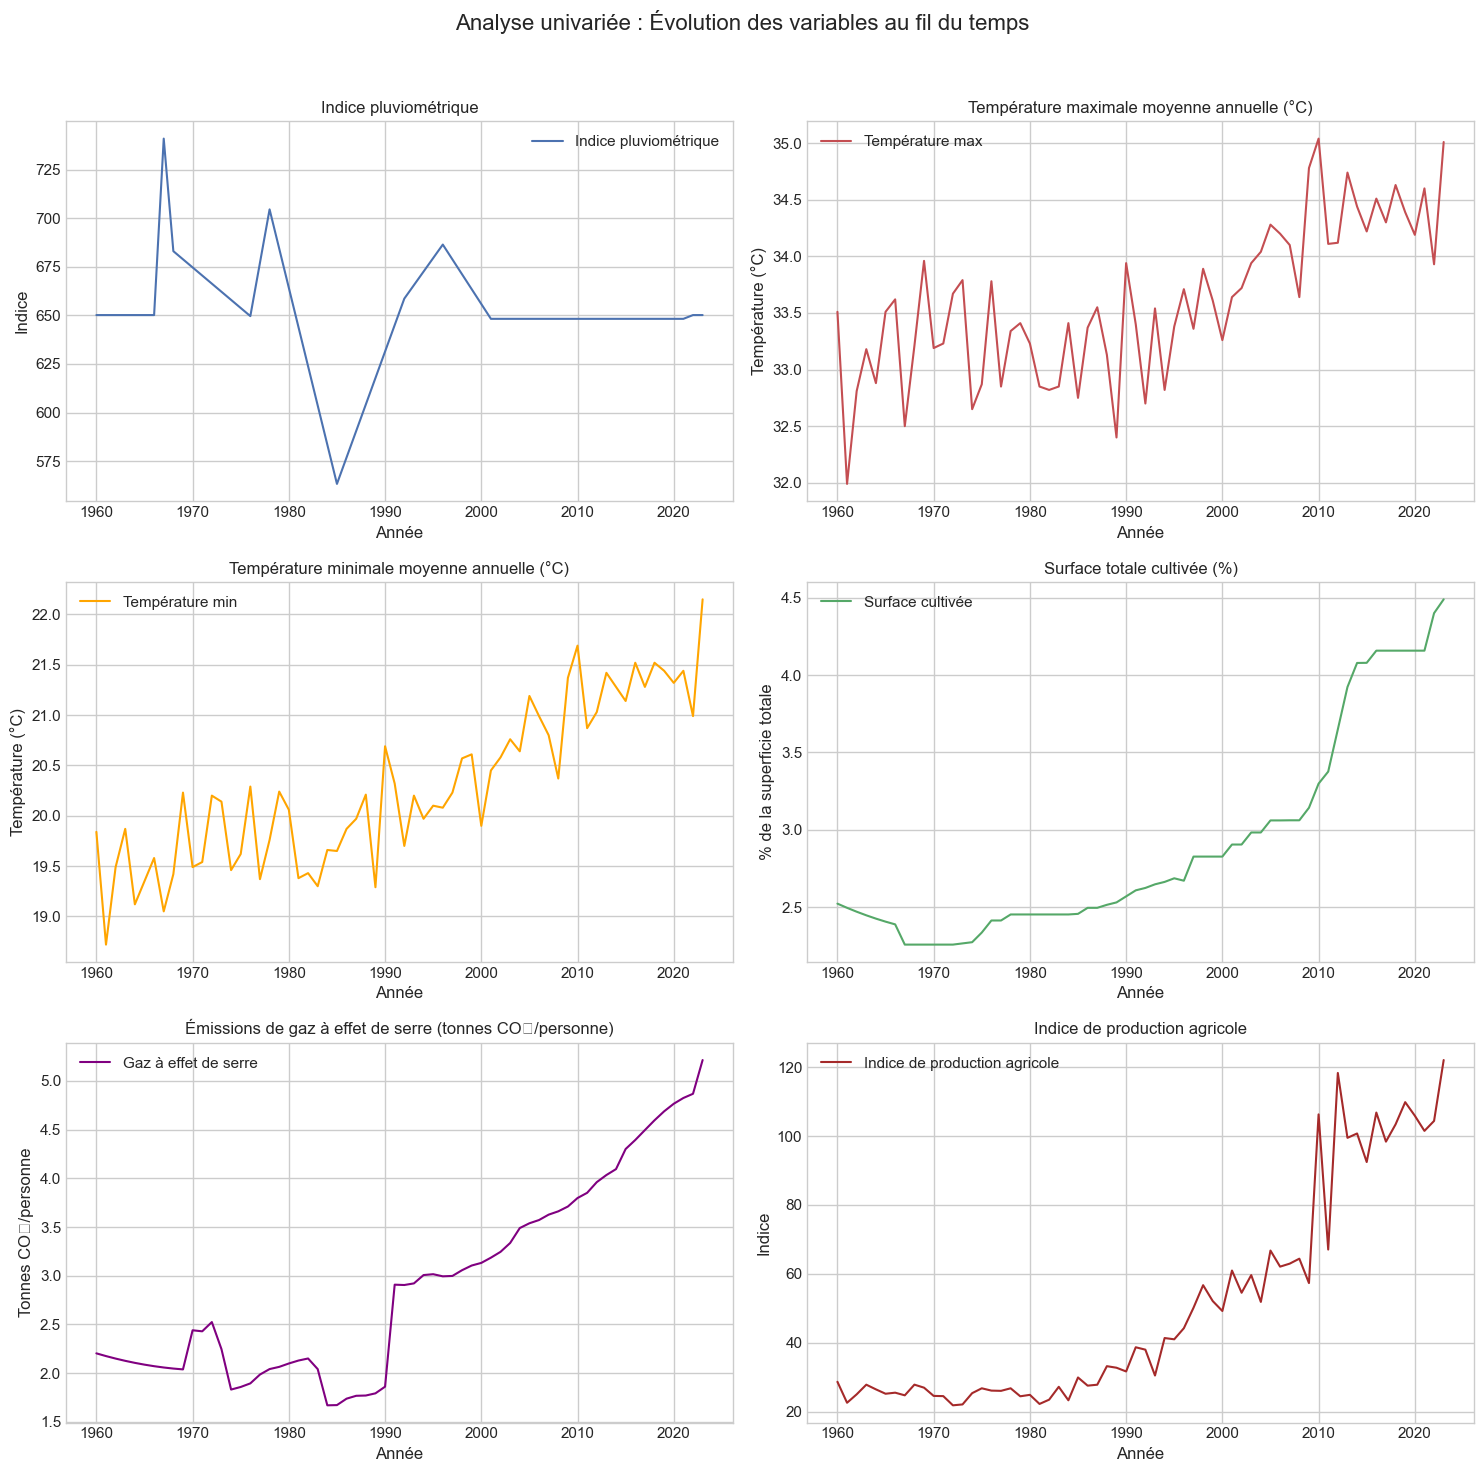

In [480]:

df=base_finale_mes
# Configuration des graphiques
plt.style.use('seaborn-v0_8-whitegrid')  # Style pour les graphiques
fig, axes = plt.subplots(3, 2, figsize=(15, 15))  # Configuration de la grille
fig.suptitle("Analyse univariée : Évolution des variables au fil du temps", fontsize=16)

# 1. Évolution de l'indice pluviométrique
axes[0, 0].plot(df['Year'], df['aqua_pluvio'], label='Indice pluviométrique', color='b')
axes[0, 0].set_title('Indice pluviométrique')
axes[0, 0].set_xlabel('Année')
axes[0, 0].set_ylabel('Indice')
axes[0, 0].legend()

# 2. Évolution de la température maximale
axes[0, 1].plot(df['Year'], df['tasmax_annuel'], label='Température max', color='r')
axes[0, 1].set_title('Température maximale moyenne annuelle (°C)')
axes[0, 1].set_xlabel('Année')
axes[0, 1].set_ylabel('Température (°C)')
axes[0, 1].legend()

# 3. Évolution de la température minimale
axes[1, 0].plot(df['Year'], df['tasmin_annuel'], label='Température min', color='orange')
axes[1, 0].set_title('Température minimale moyenne annuelle (°C)')
axes[1, 0].set_xlabel('Année')
axes[1, 0].set_ylabel('Température (°C)')
axes[1, 0].legend()

# 4. Évolution de la surface cultivée
axes[1, 1].plot(df['Year'], df['aqua_culti_land'], label='Surface cultivée', color='g')
axes[1, 1].set_title('Surface totale cultivée (%)')
axes[1, 1].set_xlabel('Année')
axes[1, 1].set_ylabel('% de la superficie totale')
axes[1, 1].legend()

# 5. Évolution des émissions de gaz à effet de serre
axes[2, 0].plot(df['Year'], df['gaz_effet_serre'], label='Gaz à effet de serre', color='purple')
axes[2, 0].set_title('Émissions de gaz à effet de serre (tonnes CO₂/personne)')
axes[2, 0].set_xlabel('Année')
axes[2, 0].set_ylabel('Tonnes CO₂/personne')
axes[2, 0].legend()

# 6. Évolution de l'indice de production agricole
axes[2, 1].plot(df['Year'], df['indice_prod_ag'], label='Indice de production agricole', color='brown')
axes[2, 1].set_title('Indice de production agricole')
axes[2, 1].set_xlabel('Année')
axes[2, 1].set_ylabel('Indice')
axes[2, 1].legend()

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Ajustement des marges
plt.show()


In [482]:
print(plt.style.available)


['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


c:\Users\Hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


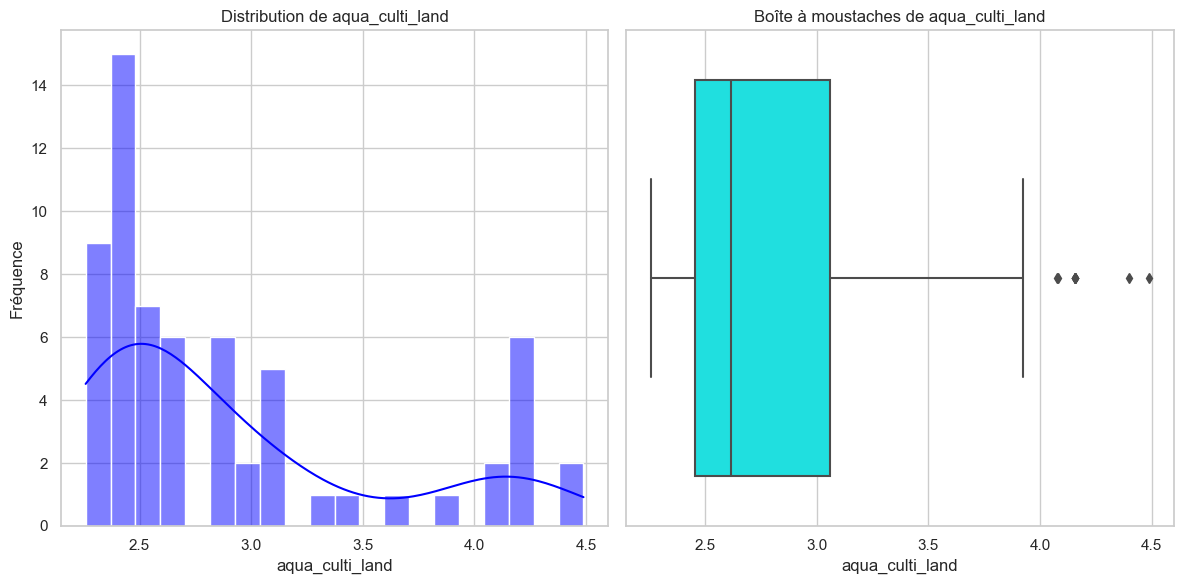

c:\Users\Hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


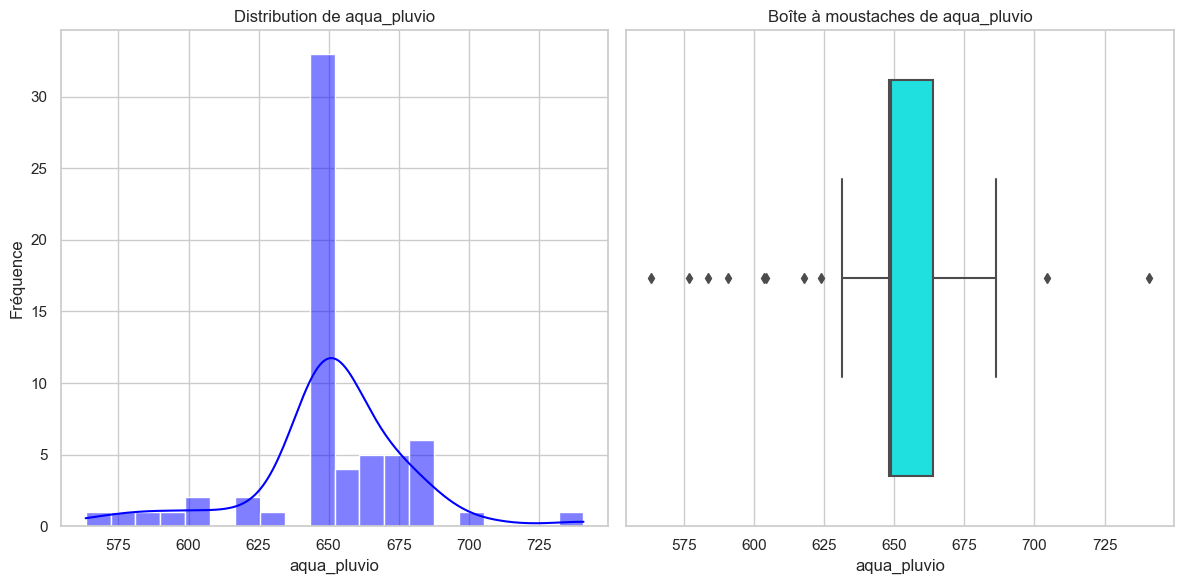

c:\Users\Hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


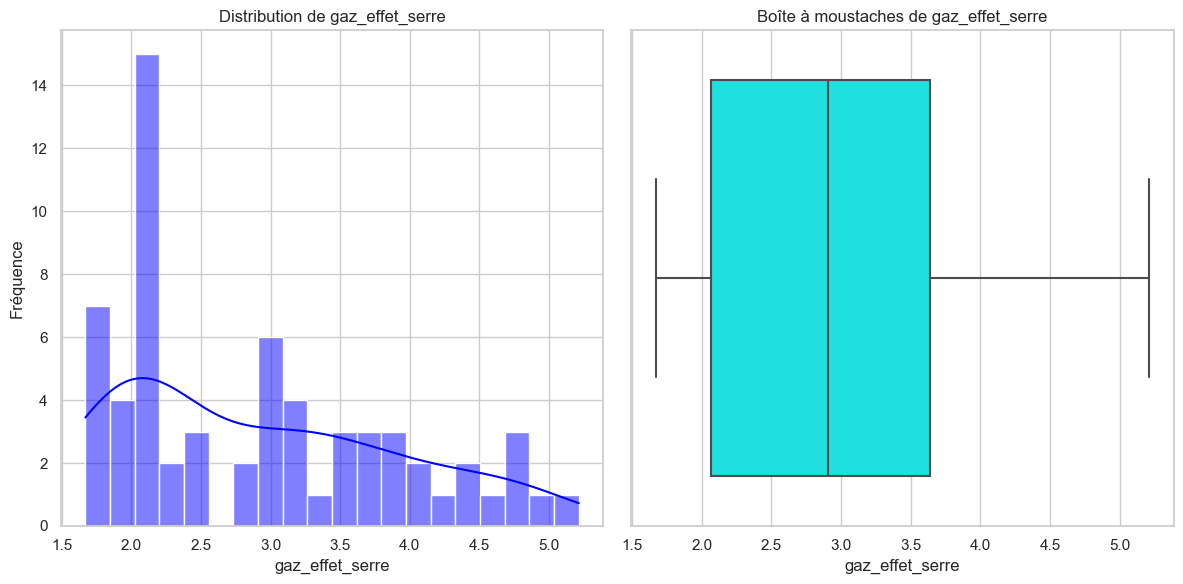

c:\Users\Hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


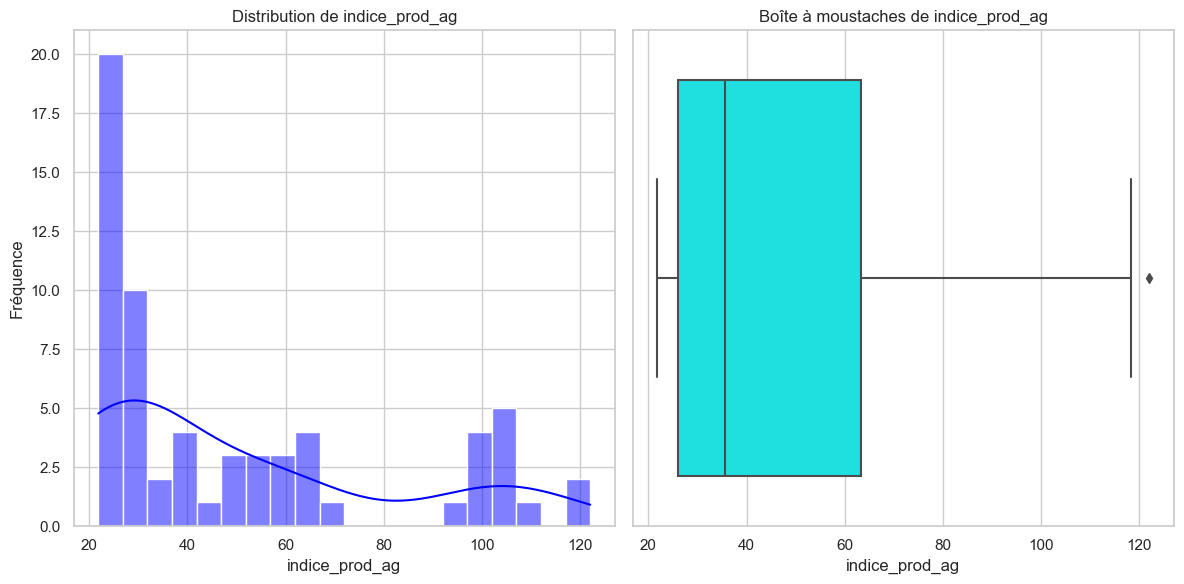

c:\Users\Hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


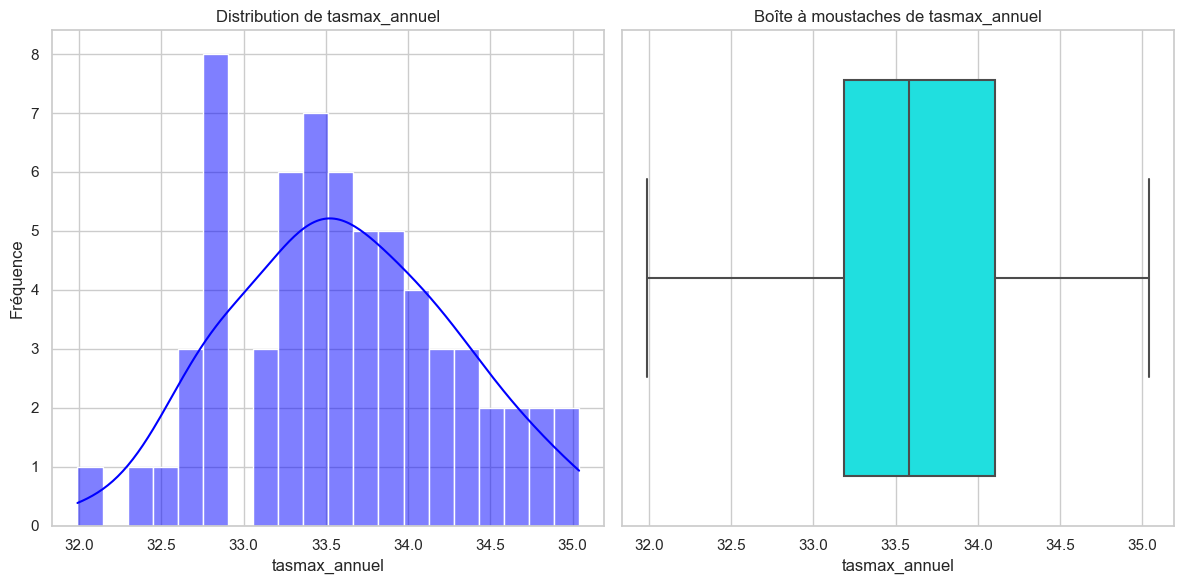

c:\Users\Hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


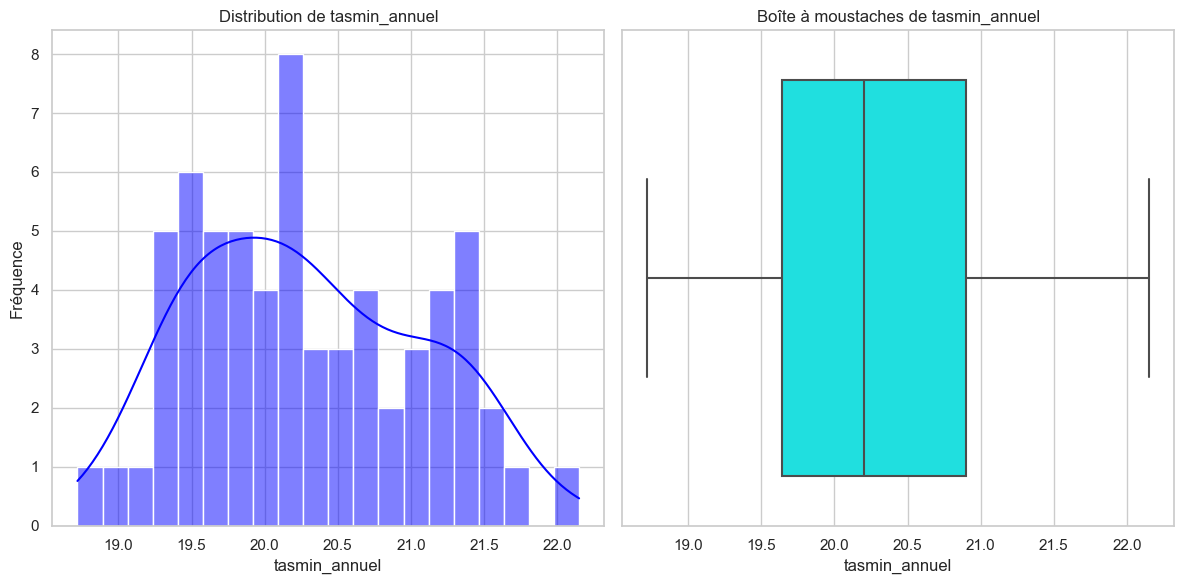

c:\Users\Hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


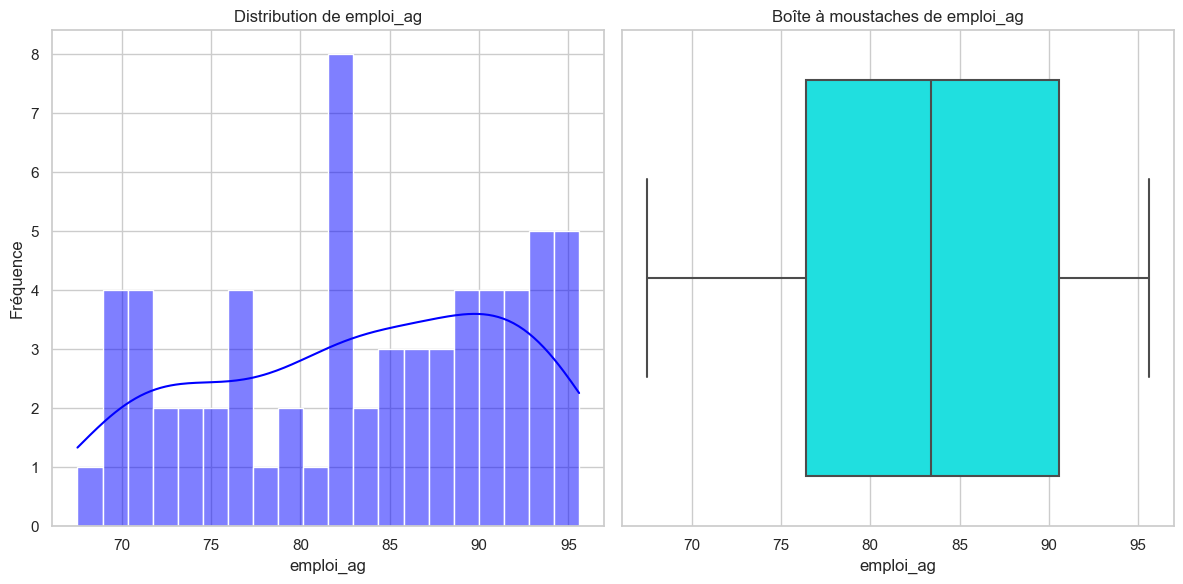

c:\Users\Hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


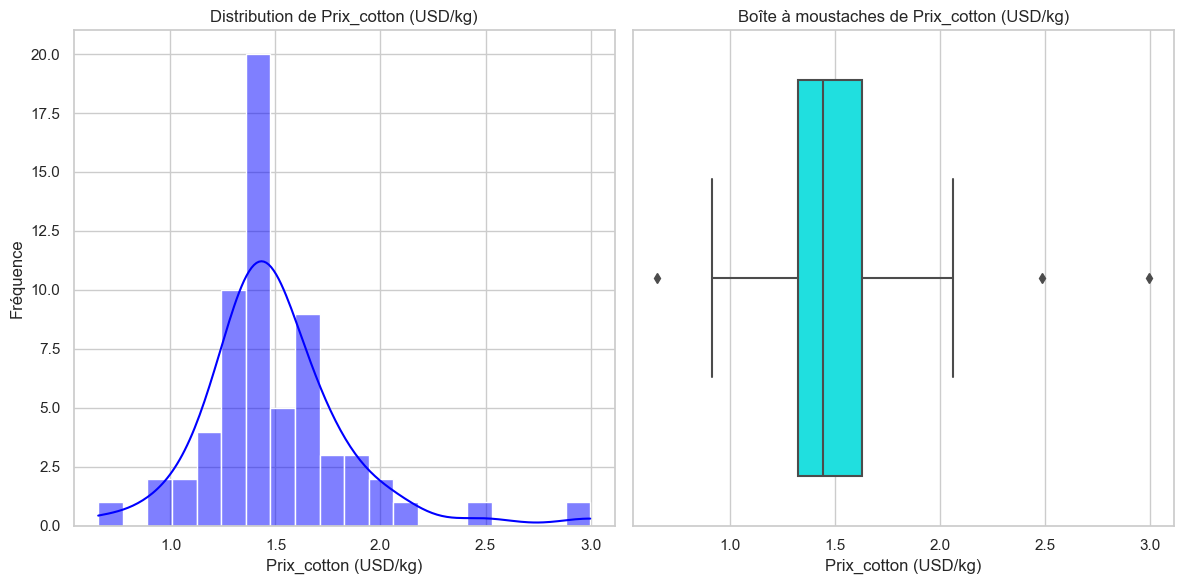

c:\Users\Hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


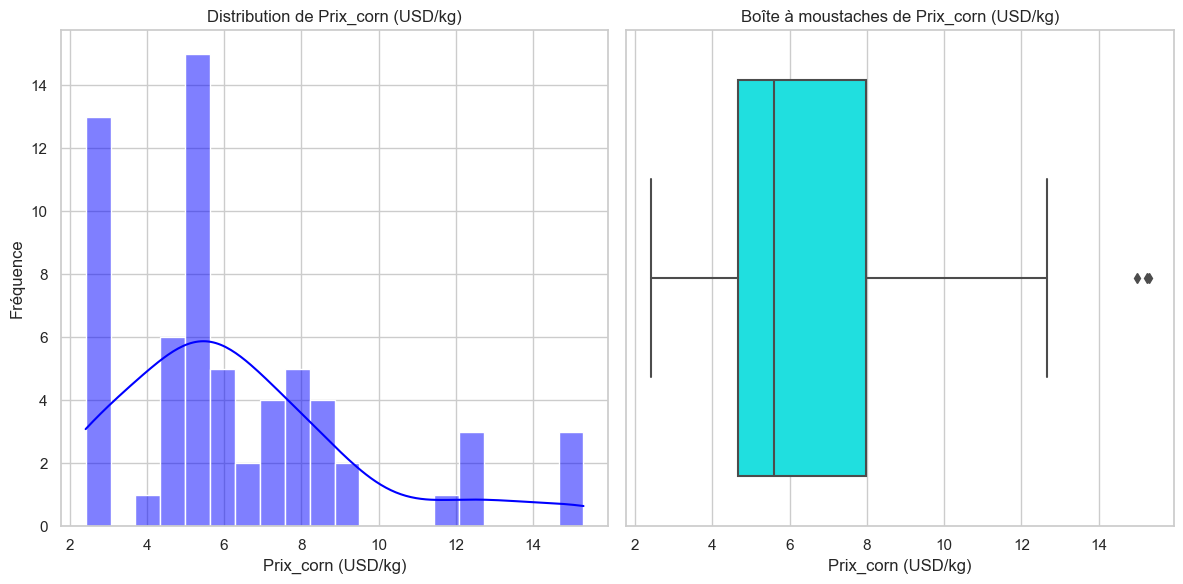

In [484]:
data = base_finale_mes.copy()


# Création de visualisations
for column in variables:
    if data[column].dtype in ['int64', 'float64']:  # Variables numériques
        plt.figure(figsize=(12, 6))
        
        # Histogramme
        plt.subplot(1, 2, 1)
        sns.histplot(data[column], kde=True, bins=20, color='blue')
        plt.title(f"Distribution de {column}")
        plt.xlabel(column)
        plt.ylabel("Fréquence")
        
        # Boîte à moustaches 
        plt.subplot(1, 2, 2)
        sns.boxplot(x=data[column], color='cyan')
        plt.title(f"Boîte à moustaches de {column}")
        plt.xlabel(column)
        
        plt.tight_layout()
        plt.show()

    else:  # Variables catégoriques
        plt.figure(figsize=(8, 4))
        sns.countplot(y=data[column], palette="viridis")
        plt.title(f"Répartition des catégories de {column}")
        plt.xlabel("Fréquence")
        plt.ylabel(column)
        plt.show()


## bivariée

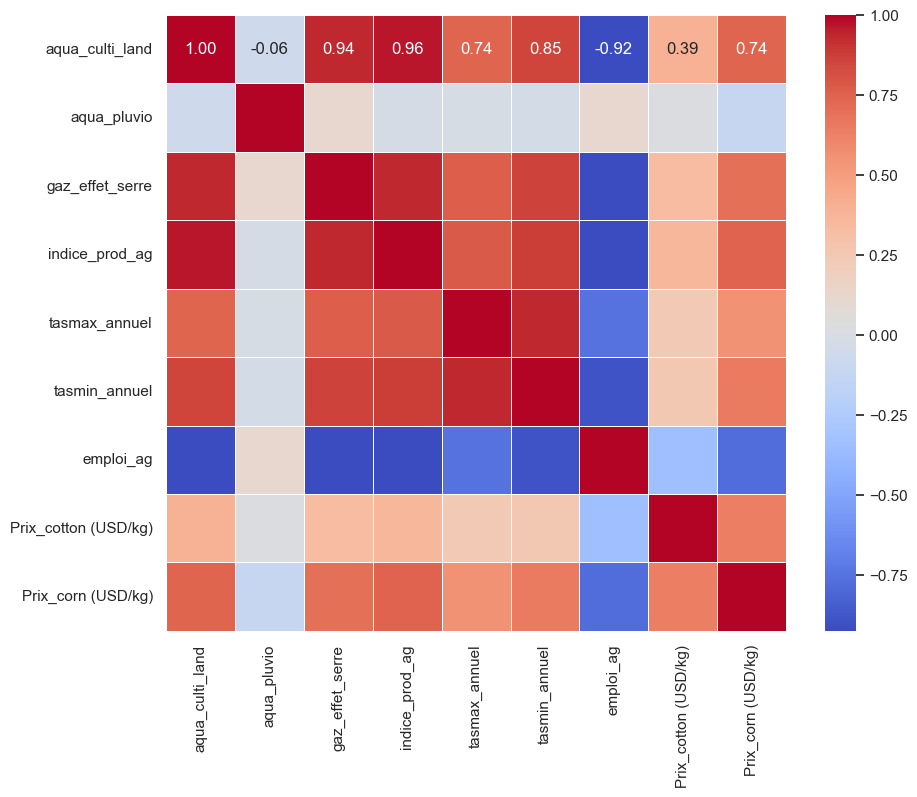

'\n# Diagrammes de dispersion pour chaque paire de variables numériques\nnum_cols = data.select_dtypes(include=[\'float64\', \'int64\']).columns\nfor i in range(len(num_cols)):\n    for j in range(i+1, len(num_cols)):\n        plt.figure(figsize=(8, 6))\n        sns.scatterplot(x=data[num_cols[i]], y=data[num_cols[j]], alpha=0.7)\n        plt.title(f"Relation entre {num_cols[i]} et {num_cols[j]}")\n        plt.xlabel(num_cols[i])\n        plt.ylabel(num_cols[j])\n        plt.show()'

In [494]:
data=base_finale_mes.copy()
# Relations entre variables numériques : Matrice de corrélation
plt.figure(figsize=(10, 8))
correlation_matrix = data[variables].corr()  # Calculer la matrice de corrélation
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
#plt.title("Matrice de corrélation")
plt.show()
"""
# Diagrammes de dispersion pour chaque paire de variables numériques
num_cols = data.select_dtypes(include=['float64', 'int64']).columns
for i in range(len(num_cols)):
    for j in range(i+1, len(num_cols)):
        plt.figure(figsize=(8, 6))
        sns.scatterplot(x=data[num_cols[i]], y=data[num_cols[j]], alpha=0.7)
        plt.title(f"Relation entre {num_cols[i]} et {num_cols[j]}")
        plt.xlabel(num_cols[i])
        plt.ylabel(num_cols[j])
        plt.show()"""

,Variable indépendante,Corrélation,P-valeur
0,aqua_culti_land,0.964316,1.719917e-37
1,aqua_pluvio,-0.020929,8.696152e-01
2,gaz_effet_serre,0.938331,2.711168e-30
3,tasmax_annuel,0.781284,2.606097e-14
4,tasmin_annuel,0.878759,1.384491e-21


Corrélations avec la variable dépendante :
  Variable indépendante  Corrélation      P-valeur
0       aqua_culti_land     0.964316  1.719917e-37
1           aqua_pluvio    -0.020929  8.696152e-01
2       gaz_effet_serre     0.938331  2.711168e-30
3         tasmax_annuel     0.781284  2.606097e-14
4         tasmin_annuel     0.878759  1.384491e-21
5             emploi_ag    -0.925362  8.284732e-28
6  Prix_cotton (USD/kg)     0.360954  3.387473e-03
7    Prix_corn (USD/kg)     0.745358  1.616605e-12


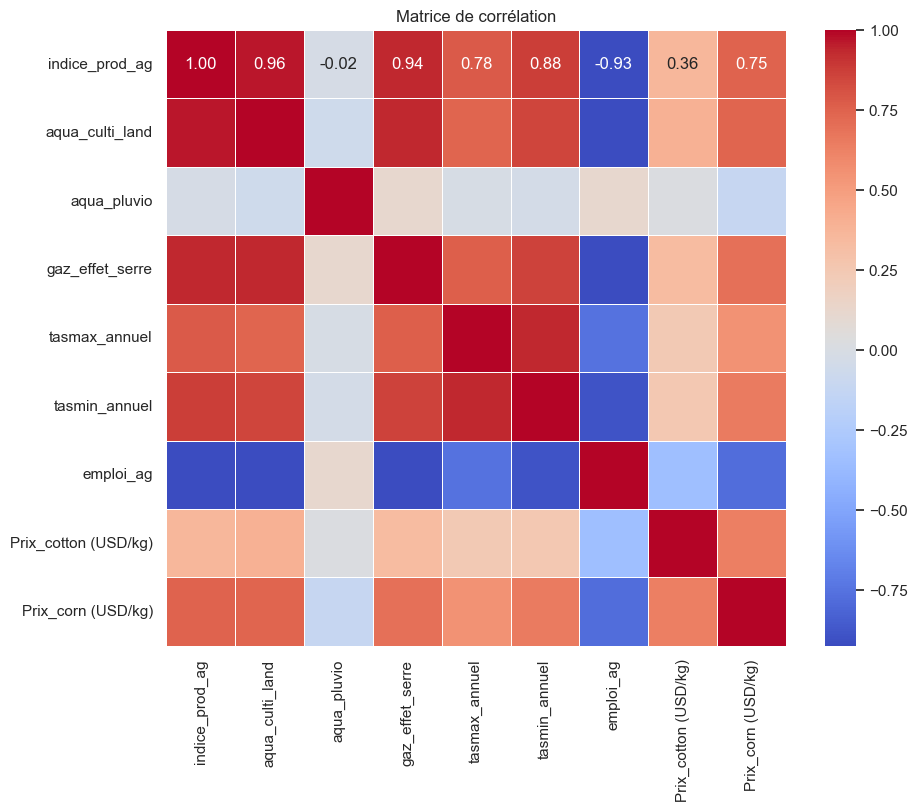

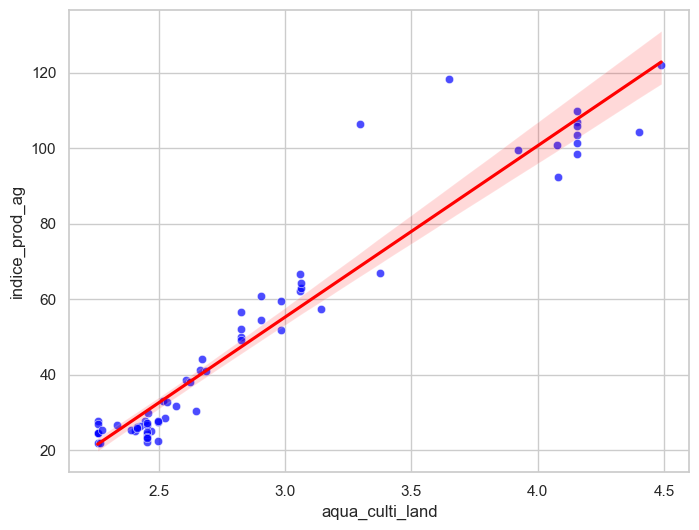

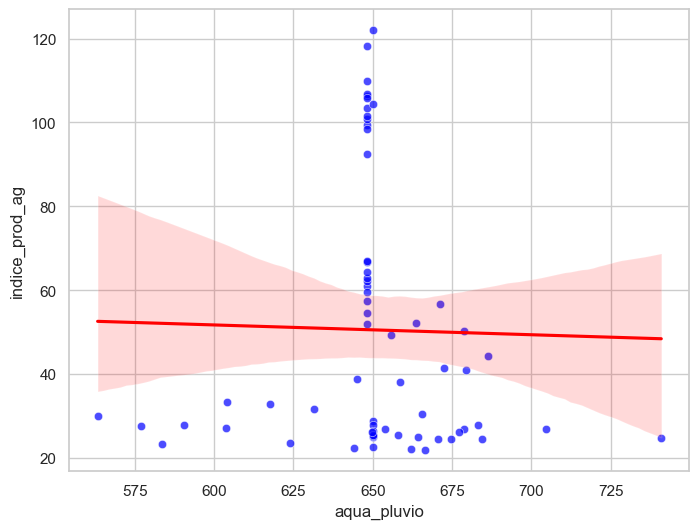

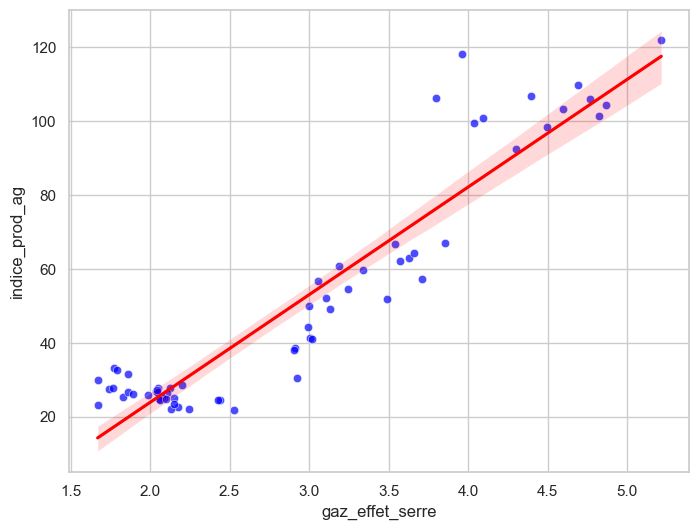

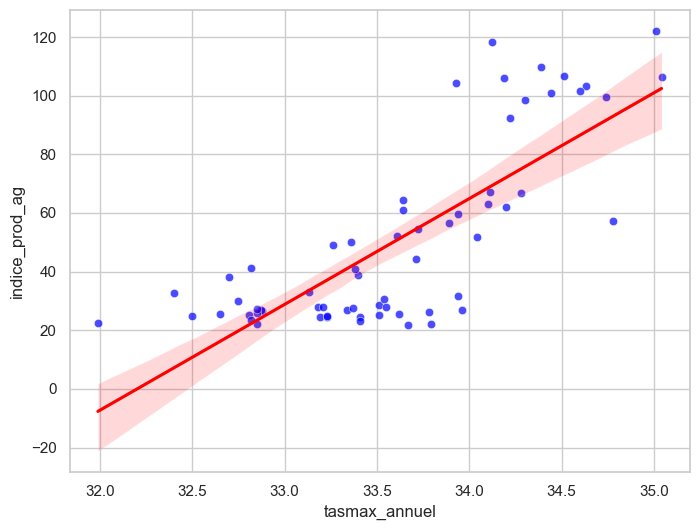

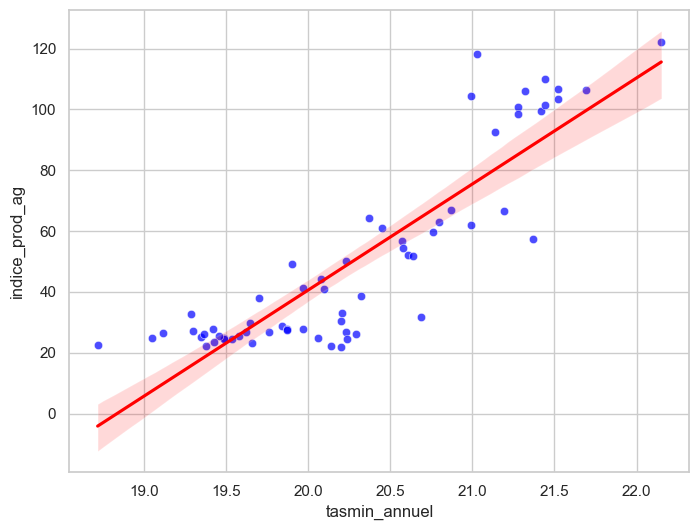

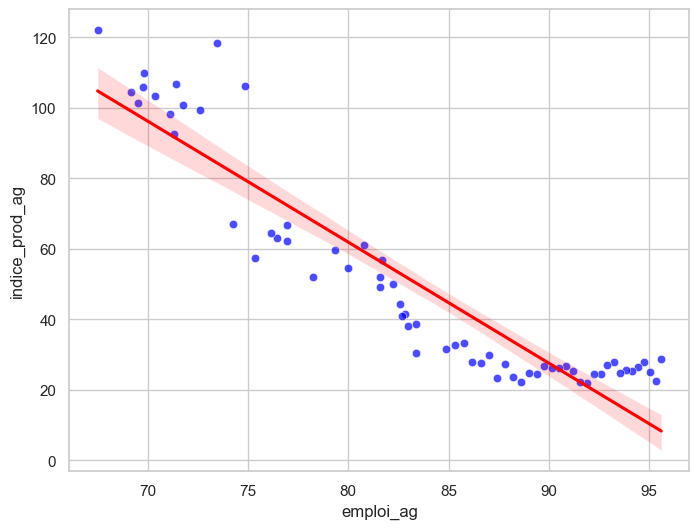

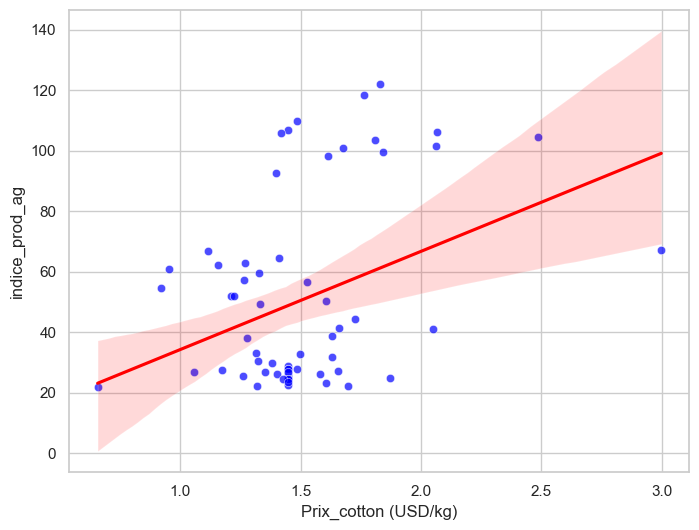

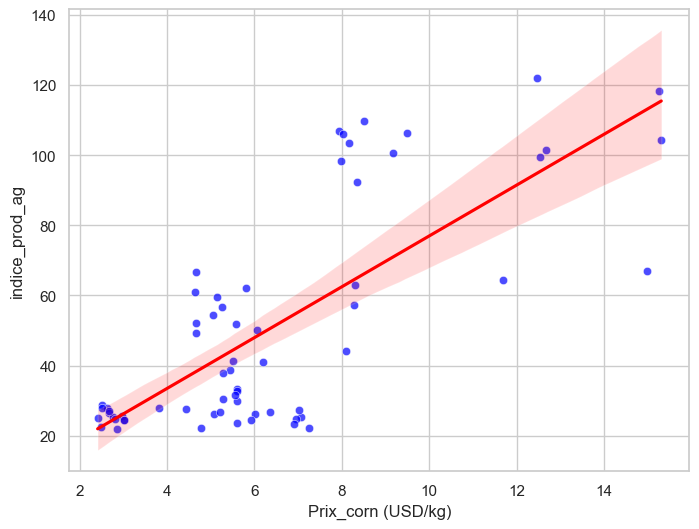

In [510]:
# Liste des variables indépendantes
a=variables
independent_vars = a
dependent_var = "indice_prod_ag"
data=base_finale_mes.copy()
# Calcul des corrélations
print("Corrélations avec la variable dépendante :")
"""for var in independent_vars:
    corr, p_value = pearsonr(data[dependent_var], data[var])
    print(f"{var} : Corrélation = {corr:.2f}, p-valeur = {p_value:.4f}")"""
# Calcul des corrélations et stockage des résultats
results = []
for var in independent_vars:
    corr, p_value = pearsonr(data[dependent_var], data[var])
    results.append({"Variable indépendante": var, 
                    "Corrélation": corr, 
                    "P-valeur": p_value})
    #"Variable dépendante": dependent_var, si on veut une colonne supp
results_df = pd.DataFrame(results)
print(results_df)
"""∣r∣ proche de 1 indique une forte relation linéaire.
𝑟>0 indique une relation positive ; 
𝑟<0, une relation négative.
Une p-valeur < 0.05 indique que la corrélation est statistiquement significative."""

# Matrice de corrélation (incluant uniquement les variables d'intérêt)
plt.figure(figsize=(10, 8))
correlation_matrix = data[[dependent_var] + independent_vars].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matrice de corrélation")
plt.show()

# Diagrammes de dispersion
for var in independent_vars:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=data[var], y=data[dependent_var], alpha=0.7, color='blue')
    sns.regplot(x=data[var], y=data[dependent_var], scatter=False, color='red',label=True)
   # plt.title(f"Relation entre {var} et {dependent_var}")
    plt.xlabel(var)
    plt.ylabel(dependent_var)
    plt.show()

In [512]:
variable_meanings

{'aqua_culti_land': 'Surface totale des terres agricoles cultivées (%)',
 'aqua_pluvio': 'Indice pluviométrique annuel',
 'gaz_effet_serre': 'Émissions totales de gaz à effet de serre (t CO2/personne)',
 'indice_prod_ag': 'Indice de production agricole',
 'tasmax_annuel': 'Température maximale moyenne annuelle (°C)',
 'tasmin_annuel': 'Température minimale moyenne annuelle (°C)',
 'emploi_ag': 'Employé agricole(%population employée)',
 'Prix_cotton (USD/kg)': 'Prix du coton($ US/kg)',
 'Prix_corn (USD/kg)': 'Prix du maïs ($ US/kg)'}

In [511]:
results_df

,Variable indépendante,Corrélation,P-valeur
0,aqua_culti_land,0.964316,1.719917e-37
1,aqua_pluvio,-0.020929,8.696152e-01
2,gaz_effet_serre,0.938331,2.711168e-30
3,tasmax_annuel,0.781284,2.606097e-14
4,tasmin_annuel,0.878759,1.384491e-21
5,emploi_ag,-0.925362,8.284732e-28
6,Prix_cotton (USD/kg),0.360954,3.387473e-03
7,Prix_corn (USD/kg),0.745358,1.616605e-12


<Figure size 1000x600 with 0 Axes>

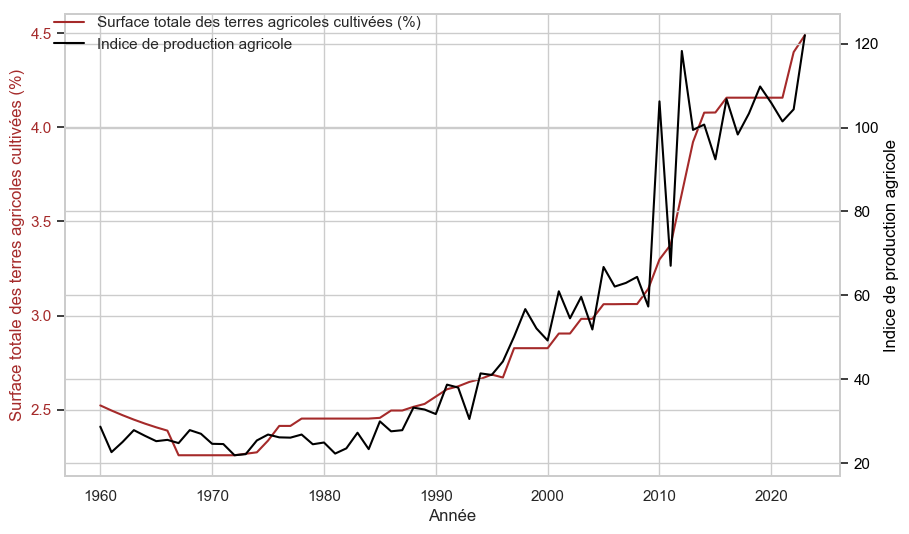

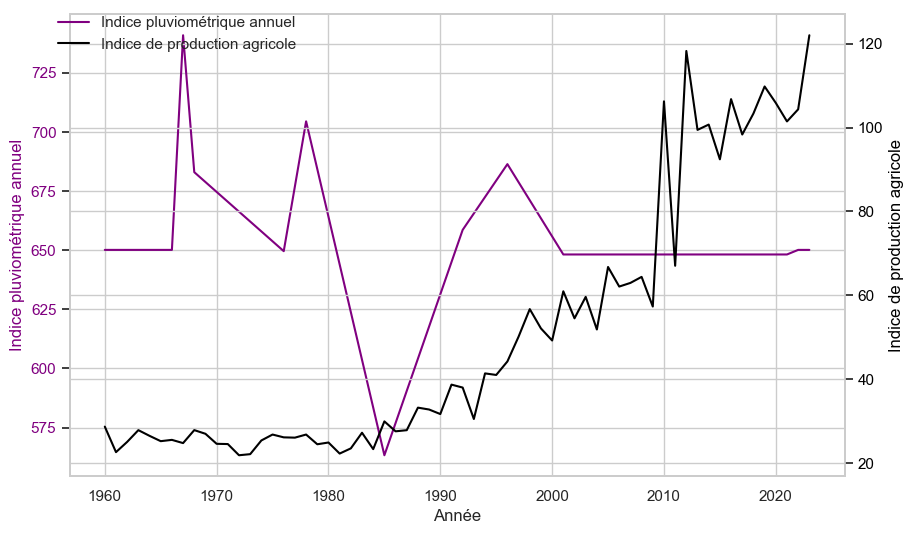

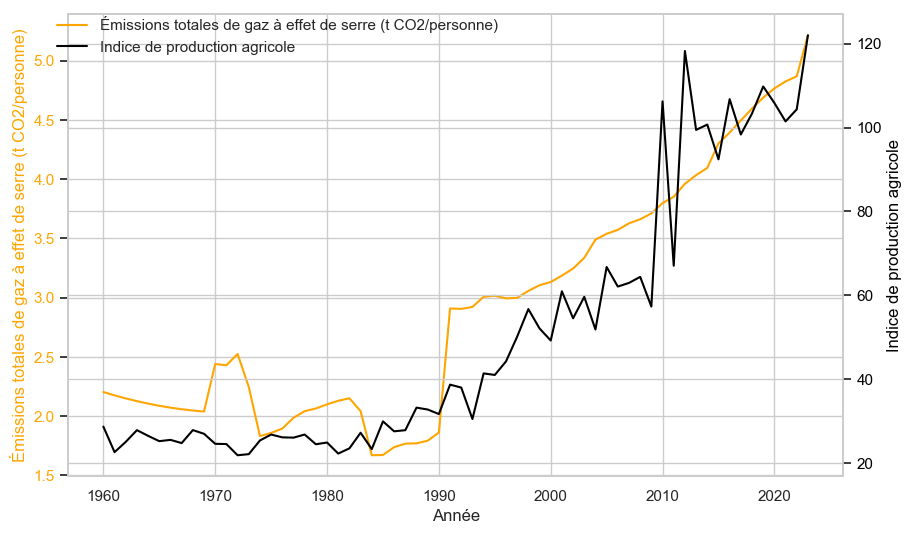

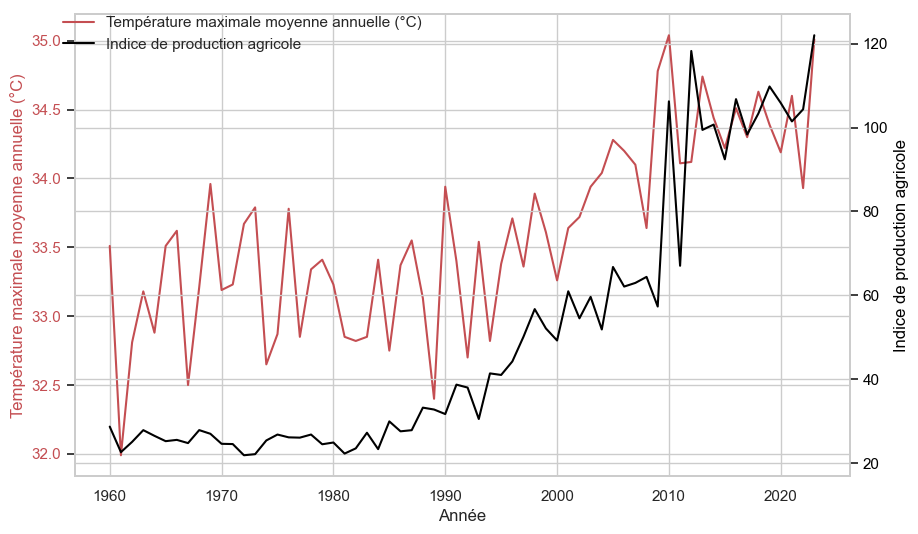

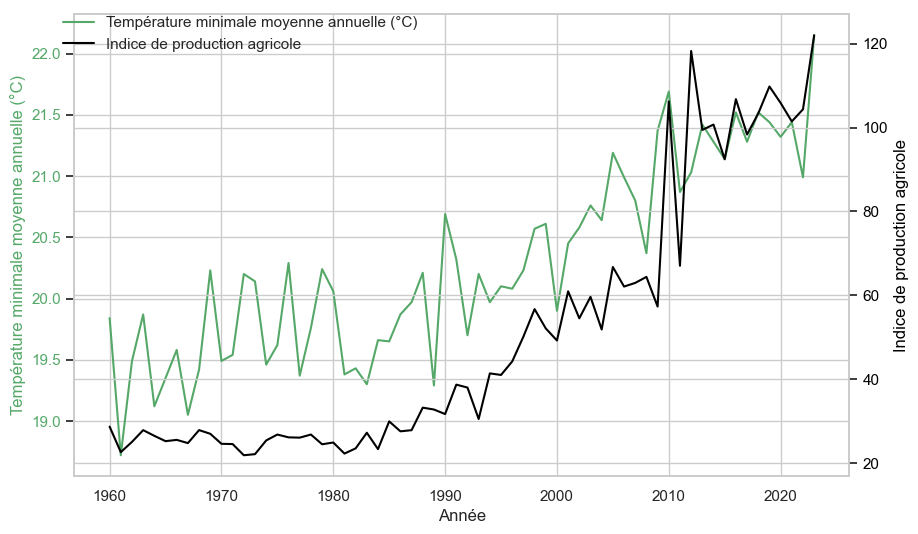

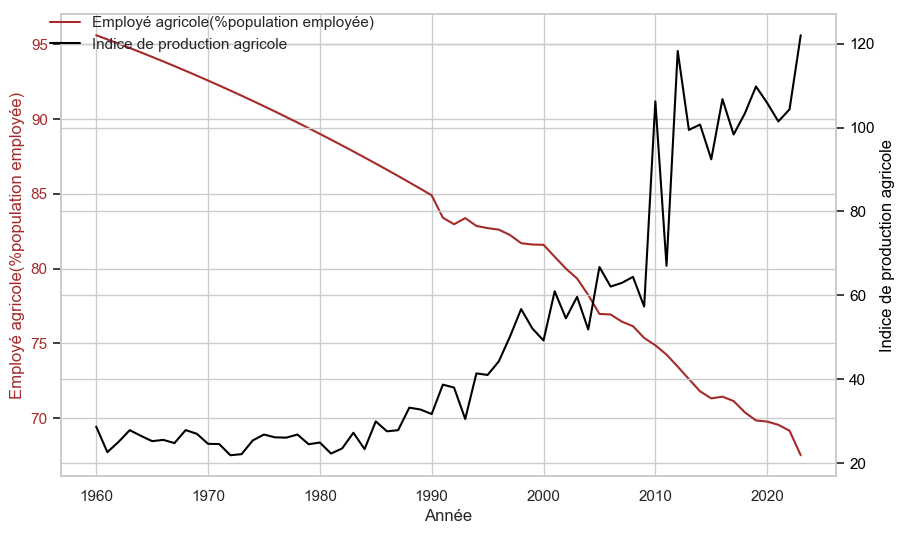

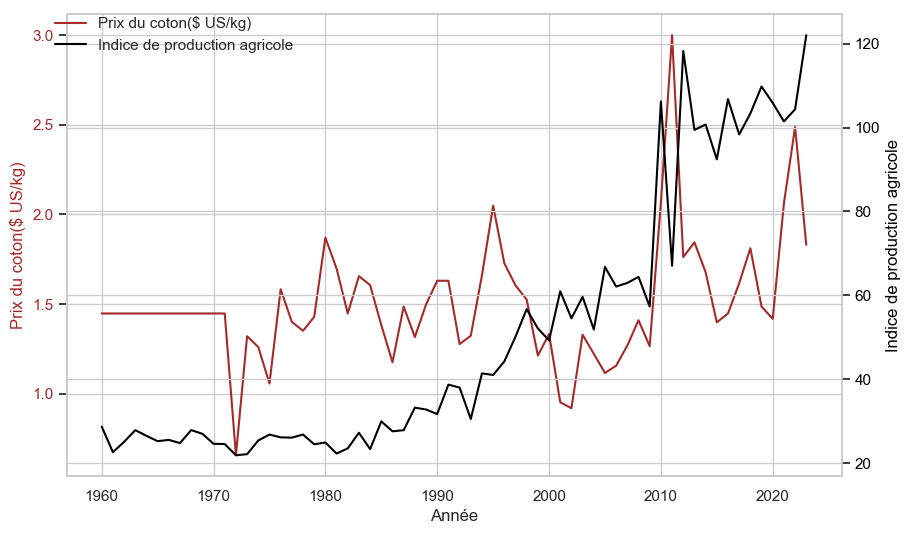

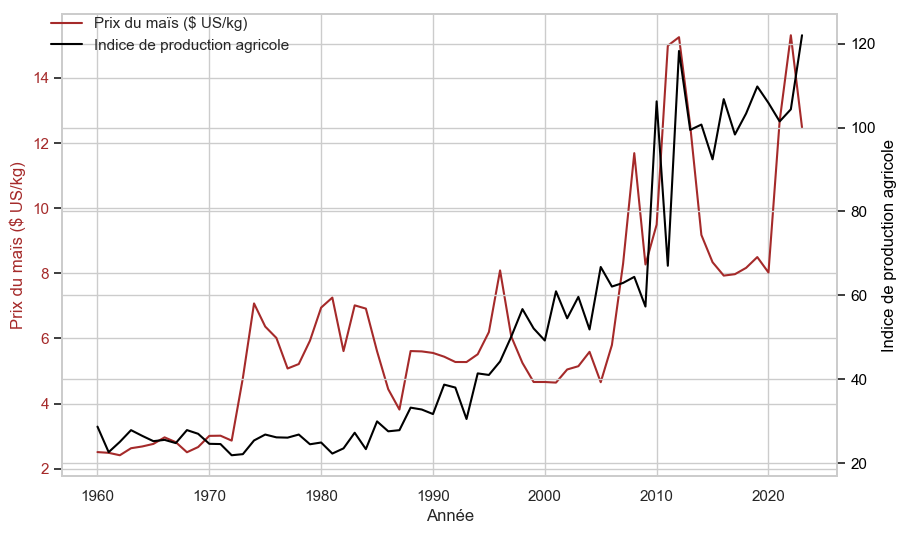

In [501]:
df=base_finale_mes

# Configuration de la figure
plt.figure(figsize=(10, 6))
for var in independent_vars:
    # Tracé de la première variable (Indice pluviométrique) sur l'axe principal
    fig, ax1 = plt.subplots(figsize=(10, 6))
    ax1.plot(df['Year'], df[var], label=f'{variable_meanings[var]}', color=f'{variable_color[var]}')
    ax1.set_xlabel('Année')
    ax1.set_ylabel(f'{variable_meanings[var]}', color=f'{variable_color[var]}')
    ax1.tick_params(axis='y', labelcolor=f'{variable_color[var]}')

    # Création d'un second axe pour l'indice de production agricole
    ax2 = ax1.twinx()
    ax2.plot(df['Year'], df['indice_prod_ag'], label='Indice de production agricole', color='black')
    ax2.set_ylabel('Indice de production agricole', color='black')
    ax2.tick_params(axis='y', labelcolor='black')

    # Ajouter une légende combinée
    fig.legend(loc="upper left", bbox_to_anchor=(0.1, 0.9))
    #plt.title('Évolution de l\'indice pluviométrique et de l\'indice de production agricole')

# Affichage du graphique
plt.show()